
# **📃Business Case: <font color="green">Jamboree Education🎓</font>  - Linear Regression**📈

<img src="https://upload.wikimedia.org/wikipedia/commons/5/53/Jamboree-logo.png">

## **Content**

- **1) About Jamboree**
- **2) How can you help here?**
- **3) Concept Used**
- **4) Libraries**
- **5) Exploring the data...**
- **6) Exploratory data analysis**
    - 6.1) Non Graphical analysis
    - 6.2) Univariate Analysis
    - 6.3) Bivariate Analysis
- **7) Data preprocessing**
    - 7.1) Check for duplicate records
    - 7.2) Check for missing values
    - 7.3) Check for outlier values
        - 7.3.1) Visualization Method
        - 7.3.2) Z-Score Method
        - 7.3.3) IQR Method
- **8) Prepare the data for modeling**
    - 8.1) Encoding
    - 8.2) Train-Test-Split
    - 8.3) Feature scaling
- **9) Model Building**
    - 9.1) Linear Regression implementation
    - 9.2) Linear Regression using OLS
    - 9.3) Test the assumptions of linear regression
        - 9.3.1) Multicollinearity check by VIF score
        - 9.3.2) Mean of residuals
        - 9.3.3) Linear relationship between independent & dependent variables
        - 9.3.4) Test for Homoscedasticity
        - 9.3.5) Normality of residuals
    - 9.4) Polynomial Regression
        - 9.4.1) Find the best degree
        - 9.4.2) Polynomial Regression implementation
    - 9.5) Regularization
        - 9.5.1) Laso regression model
        - 9.5.2) Ridge regression model
        - 9.5.3) Elastic Net regression model
    - 9.6) Model Conclusion

- **10) Inference**
- **11) Recommendations**



## **1) About <font color="green">Jamboree</font>📗**

- Jamboree has **helped thousands of students like you make it to top colleges abroad.** Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.

- They recently launched a feature where students/learners can come to their website and check their **probability of getting into the IVY league college.** This feature estimates the chances of graduate admission from an Indian perspective.

## **2) How can you help here?👀**

Your analysis will help Jamboree in understanding **what factors are important in graduate admissions and how these factors are interrelated among themselves.** It will also help predict one's chances of admission given the rest of the variables.

## **3) Concept Used📑**

- **E**xploratory **D**ata **A**nalysis
- **L**inear **R**egression

## **4) Libraries📚**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from scipy.stats import shapiro

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge, ElasticNet

import warnings
warnings.filterwarnings('ignore')

## **5) Exploring the data...🔎**

In [ ]:
# Loading the data
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Sets/Jamboree_admission.csv")

In [ ]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [ ]:
# Checking the number of rows and columns
print(f"The number of rows: {data.shape[0]:,} \nThe number of columns: {data.shape[1]}")

The number of rows: 500 
The number of columns: 9


In [ ]:
# Check all column names
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

**🔍OBSERVATION🔎**

The data set has 500 rows and 9 columns

**Column Profiling:**

- **Serial No.:** This column represents the unique row identifier for each applicant in the dataset.
- **GRE Scores:** This column contains the GRE (Graduate Record Examination) scores of the applicants, which are measured on a scale of 0 to 340.
- **TOEFL Scores:** This column includes the TOEFL (Test of English as a Foreign Language) scores of the applicants, which are measured on a scale of 0 to 120.
- **University Rating:** This column indicates the rating or reputation of the university that the applicants are associated with.
  - The rating is based on a scale of 0 to 5, with 5 representing the highest rating.
- **SOP:** This column represents the strength of the applicant's statement of purpose, rated on a scale of 0 to 5, with 5 indicating a strong and compelling SOP.
- **LOR:** This column represents the strength of the applicant's letter of recommendation, rated on a scale of 0 to 5, with 5 indicating a strong and compelling LOR.
- **CGPA:** This column contains the undergraduate Grade Point Average (GPA) of the applicants, which is measured on a scale of 0 to 10.
- **Research:** This column indicates whether the applicant has research experience (1) or not (0).
- **Chance of Admit:** This column represents the estimated probability or chance of admission for each applicant, ranging from 0 to 1.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


## **6) Exploratory data analysis📊📈**

### <font color="green">**6.1) Non Graphical analysis📰**</font>

In [ ]:
# Number of unique values in each coluumn
print("Number of unique values in each coluumn:")
print("-" * 40)
for elem in (data.columns):
  print(f"{elem}: {data[elem].nunique()}")

Number of unique values in each coluumn:
----------------------------------------
Serial No.: 500
GRE Score: 49
TOEFL Score: 29
University Rating: 5
SOP: 9
LOR : 9
CGPA: 184
Research: 2
Chance of Admit : 61


In [ ]:
# Unique values in the follwing columns
print("Unique values in the following coluumn:")
print("-" * 39)
req_cols = ['University Rating', 'Research']
for elem in req_cols:
  print(f"{elem}: {data[elem].unique()}")

Unique values in the following coluumn:
---------------------------------------
University Rating: [4 3 2 5 1]
Research: [1 0]


**🔍OBSERVATION🔎**
- The columns University Rating has 5 unique values and Research has 2 unique values so we can convert to Categorical datatype.

- Since the column Serial No is irrelevant, we can drop them.


In [ ]:
# Convert columns to a categorical type
data['University Rating'] = data['University Rating'].astype('category')
data['Research'] = data['Research'].astype('category')

# Drop the Serial No. column
data.drop(columns=['Serial No.'], inplace=True)

In [ ]:
# Checking the column names
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
# Removing the unwanted space in the column names
data.rename(columns={'Chance of Admit ':'Chance of Admit'}, inplace=True)
data.rename(columns={'LOR ':'LOR'}, inplace=True)

In [ ]:
# Sanity check
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [ ]:
# Check the data type of each column
print("Data types of each column:")
print("-" * 27)
data.dtypes

Data types of each column:
---------------------------


GRE Score               int64
TOEFL Score             int64
University Rating    category
SOP                   float64
LOR                   float64
CGPA                  float64
Research             category
Chance of Admit       float64
dtype: object

In [ ]:
# Display the range of attributes
print("Range of attributes:")
print("-" * 20)
data.describe(include='all').T

Range of attributes:
--------------------


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
GRE Score,500.0,NaN,NaN,NaN,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,NaN,NaN,NaN,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,5.0,3.0,162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SOP,500.0,NaN,NaN,NaN,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,NaN,NaN,NaN,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,NaN,NaN,NaN,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,2.0,1.0,280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Chance of Admit,500.0,NaN,NaN,NaN,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [ ]:
# Display the statistical summary
print("statistical summary:")
print("-" * 20)
data.describe().T

statistical summary:
--------------------


,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


**🔍OBSERVATION🔎**
- The GRE scores of applicants range from 290 to 340, with an average score of approximately 316.5. Most scores are clustered between 308 and 325, as indicated by the interquartile range.
- The TOEFL scores range from 92 to 120, with an average score of about 107. The majority of the scores fall between 103 and 112.
- University ratings range from 1 to 5, with the most common rating being 3
- SOP ratings vary from 1 to 5, with an average rating of about 3.37. Most ratings are between 2.5 and 4.
- LOR ratings also range from 1 to 5, with an average rating of about 3.48. The majority of ratings are between 3 and 4.
- CGPA ranges from 6.8 to 9.92, with an average CGPA of about 8.58. Most CGPAs lie between 8.13 and 9.04.
-  The research experience is binary (0 or 1). Most applicants (280 out of 500) have research experience.
- The probability of admission ranges from 0.34 to 0.97, with an average of about 0.72. Most probabilities fall between 0.63 and 0.82.

### <font color="green">**6.2) Univariate Analysis📈**</font>

In [ ]:
green_palette = ['#006400', '#008000', '#228B22', '#32CD32', '#3CB371', '#66CDAA', '#7FFF00', '#00FF7F', '#98FB98', '#ADFF2F']

In [ ]:
# Value couts for categorical columns
categorical_cols = data.select_dtypes(include=['category']).columns
for elem in categorical_cols:
  print(f"Column Name: {elem}")
  print(data[elem].value_counts())
  print("_" * 35)
  print()

Column Name: University Rating
University Rating
3    162
2    126
4    105
5     73
1     34
Name: count, dtype: int64
___________________________________

Column Name: Research
Research
1    280
0    220
Name: count, dtype: int64
___________________________________



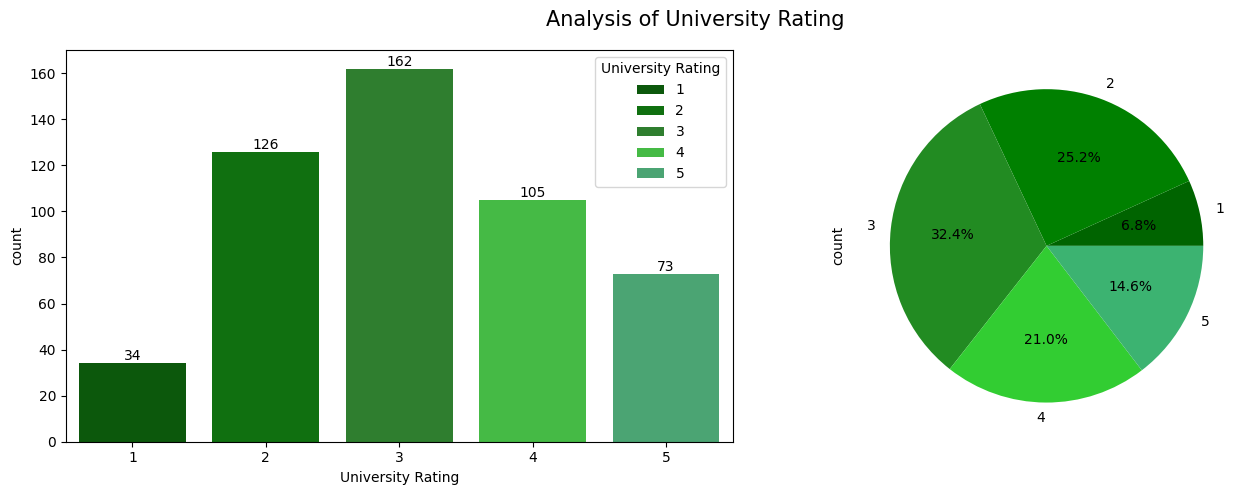

In [ ]:
# Analysis of University Rating
green_palette = ['#006400', '#008000', '#228B22', '#32CD32', '#3CB371', '#66CDAA', '#7FFF00', '#00FF7F', '#98FB98', '#ADFF2F']

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
label = sns.countplot(data = data, x='University Rating', hue = 'University Rating', palette = green_palette)
for i in label.containers:
    label.bar_label(i)

plt.subplot(1, 2, 2)
labels = data.groupby("University Rating")["University Rating"].count().index.categories
values = data.groupby("University Rating")["University Rating"].count().values
plt.pie(values, labels = labels, autopct = "%1.1f%%", colors = green_palette)

plt.ylabel("count")
plt.suptitle("Analysis of University Rating", fontsize = 15)
plt.tight_layout()
plt.show()

**🔍OBSERVATION🔎**
- The **university rating 3** is most common amoung applicants and contribution of university rating 3 is **32%**
- The **university rating 2** is second most common amoung applicants and contribution of university rating 2 is **25%**
- The **university rating 4** is third most common amoung applicants and contribution of university rating 4 is **21%**


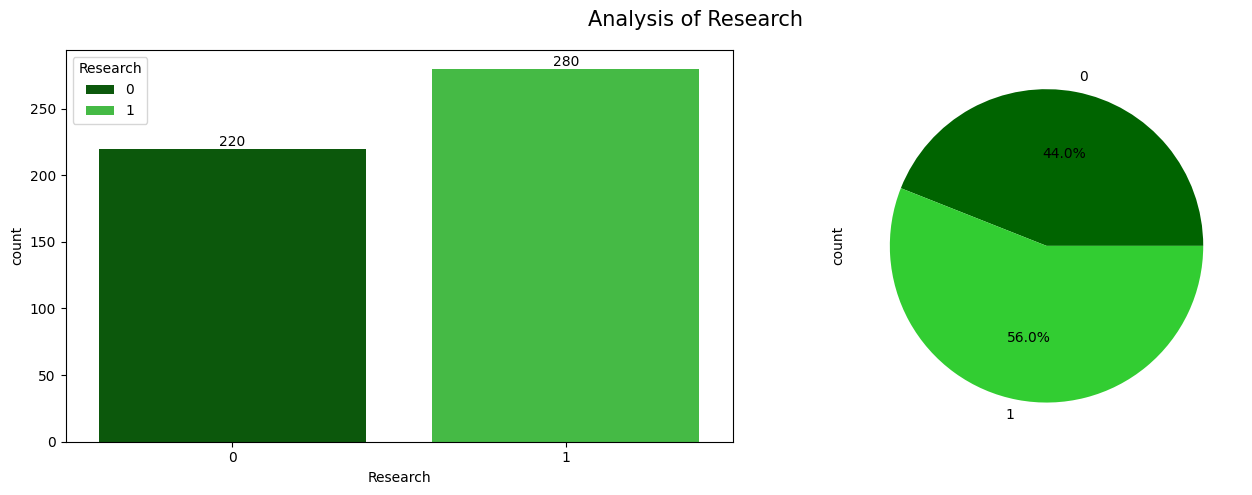

In [ ]:
# Analysis of Research
palette = ['#006400', '#32CD32']

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
label = sns.countplot(data = data, x='Research', hue = 'Research', palette = palette)
for i in label.containers:
    label.bar_label(i)

plt.subplot(1, 2, 2)
labels = data.groupby("Research")["Research"].count().index.categories
values = data.groupby("Research")["Research"].count().values
plt.pie(values, labels = labels, autopct = "%1.1f%%", colors = palette)

plt.ylabel("count")
plt.suptitle("Analysis of Research", fontsize = 15)
plt.tight_layout()
plt.show()

**🔍OBSERVATION🔎**
- Among 500 applicants, **280 applicants** have research experience.
- **56%** proportion of applicants have research experience

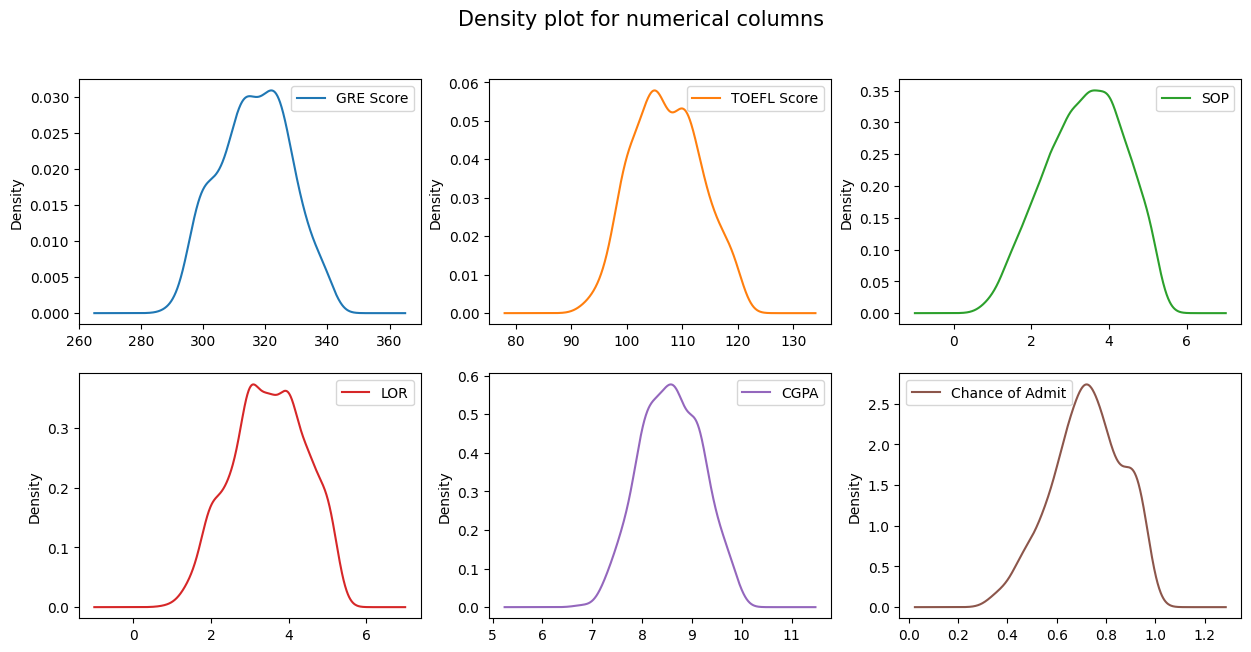

In [ ]:
# Density plot for numerical columns
numerical_df = data.select_dtypes(include=['int64','float64'])

plt.rcParams["figure.figsize"] = [15,7]
numerical_df.plot(kind="density", subplots = True, layout = (2,3), sharex = False)
plt.suptitle("Density plot for numerical columns", fontsize = 15)
plt.show()

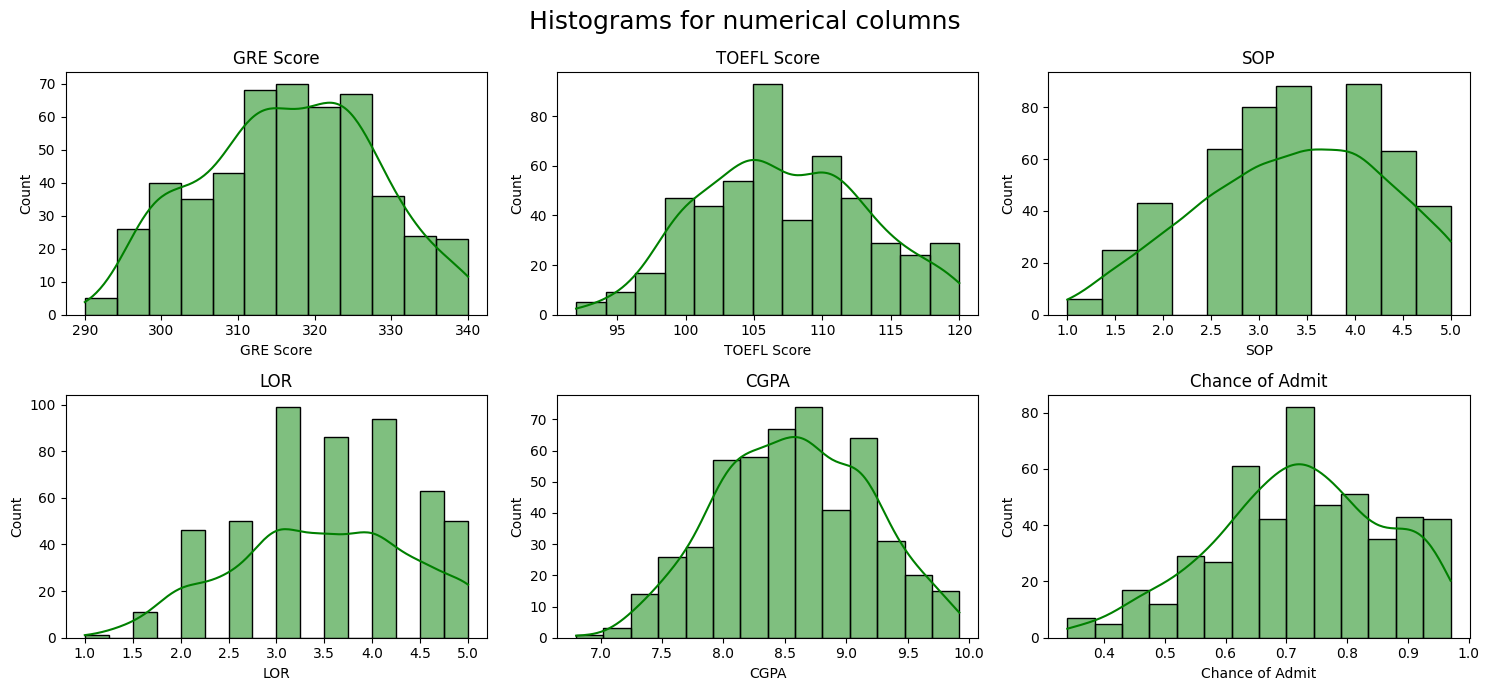

In [ ]:
# Histograms for numerical columns
numerical_cols = numerical_df.columns

plt.figure(figsize=(15,7))
for i, elem in enumerate(numerical_cols):
  plt.subplot(2,3,i+1)
  sns.histplot(data[elem], kde=True, color='green')
  plt.title(elem)
plt.suptitle("Histograms for numerical columns", fontsize = 18)
plt.tight_layout()
plt.show()

In [ ]:
# Skewness Coefficient:
print("Skewness Coefficient")
print("-" * 20)
numerical_df.skew().round(4)

Skewness Coefficient
--------------------


GRE Score         -0.0398
TOEFL Score        0.0956
SOP               -0.2290
LOR               -0.1453
CGPA              -0.0266
Chance of Admit   -0.2900
dtype: float64

**🔍OBSERVATION🔎**

- The distribution of GRE scores is approximately symmetric. This suggests that the data is evenly distributed around the mean.

- The distribution of TOEFL scores shows a slight right skew, with more scores concentrated towards the lower end and a tail extending towards higher scores.

- The distribution of SOP ratings is slightly negatively skewed. There are more higher ratings indicating that most applicants have strong SOPs.

- The distribution of LOR ratings is slightly negatively skewed. There are more higher ratings suggesting that most applicants have strong LORs.

- The distribution of CGPA scores is almost symmetric, with a skewness coefficient close to zero. This indicates an even distribution around the mean CGPA.

- The distribution of chances of admission is negatively skewed, indicating that more applicants tend to have higher chances of admission.

- The distribution of chances of admission is negatively skewed. There are more applicants with higher chances of admission indicating that overall, the distribution is skewed towards higher probabilities of admission.

- Generally, most variables show a slight negative skewness, suggesting a tendency towards higher scores or ratings.

In [ ]:
# kurtosis co-efficient:
print("kurtosis co-efficient")
print("-" * 22)
numerical_df.kurt().round(4)

kurtosis co-efficient
----------------------


GRE Score         -0.7111
TOEFL Score       -0.6532
SOP               -0.7057
LOR               -0.7457
CGPA              -0.5613
Chance of Admit   -0.4547
dtype: float64

**🔍OBSERVATION🔎**
- The distribution of GRE scores is platykurtic, indicating that it has lighter tails compared to a normal distribution. This suggests that the distribution has fewer extreme values.
- The distribution of SOP ratings is platykurtic, indicating lighter tails compared to a normal distribution. This suggests that the distribution is relatively more concentrated around the mean SOP rating.
- The distribution of LOR ratings is platykurtic, indicating lighter tails compared to a normal distribution. This suggests that extreme ratings less common.
- The distribution of CGPA scores is platykurtic, indicating lighter tails compared to a normal distribution. This suggests that the distribution is more concentrated around the mean CGPA score
- The distribution of chances of admission is platykurtic, indicating lighter tails compared to a normal distribution. This suggests that extreme chances of admission are less common.

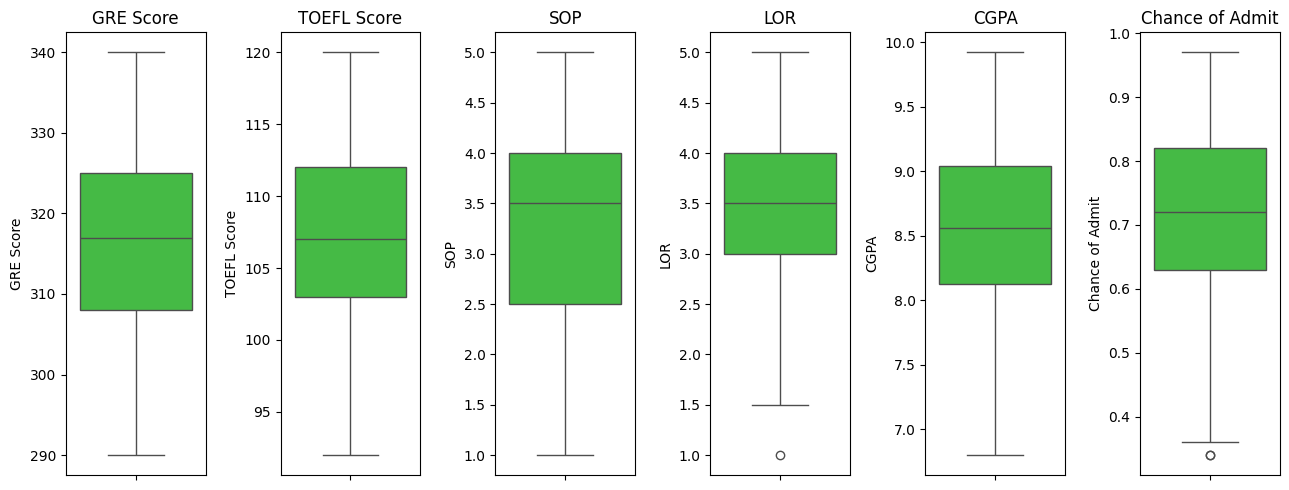

In [ ]:
# Box plots for numerical columns
palette = ['#32CD32']
plt.figure(figsize=(13, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i+1)
    sns.boxplot(data[col],palette = palette)
    plt.title(col)
plt.tight_layout()
plt.show()

**🔍OBSERVATION🔎**

- Based on the absence of outliers in GRE Score, TOEFL Score, SOP, and CGPA, and the limited presence of outliers in LOR and Chance of Admit, the dataset exhibits relatively stable distributions across most numerical attributes.

### <font color="green">**6.3) Bivariate Analysis📊📈**</font>

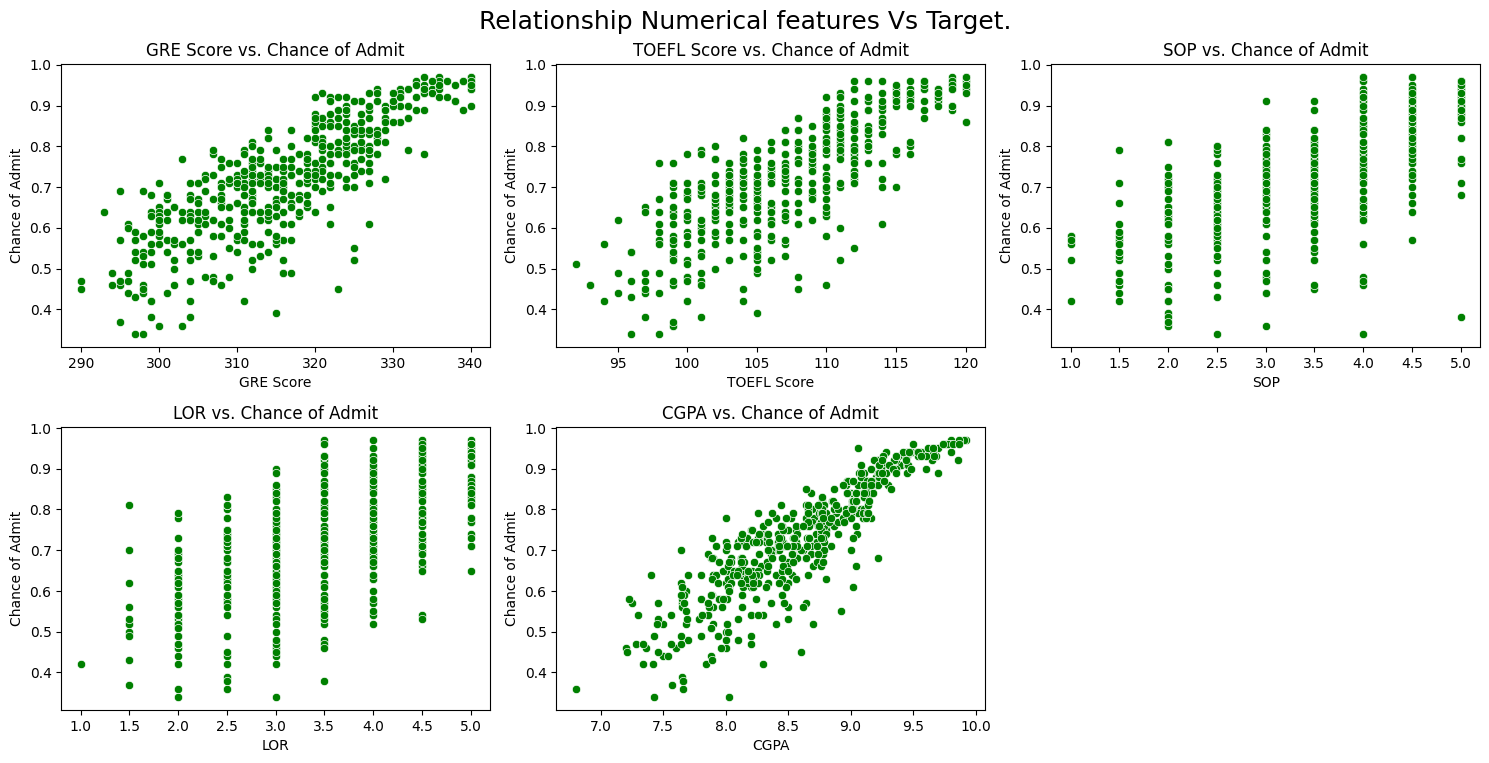

In [ ]:
# Relationship Numerical features Vs Target
numerical_cols_except_target = numerical_cols[:-1]

plt.figure(figsize=(15, 11))
for i, elem in enumerate(numerical_cols_except_target):
  plt.subplot(3, 3, i+1)
  sns.scatterplot(x=elem, y='Chance of Admit', data=data, color="green")
  plt.title(f"{elem} vs. Chance of Admit")

plt.suptitle("Relationship Numerical features Vs Target.", fontsize = 18)
plt.tight_layout()
plt.show()

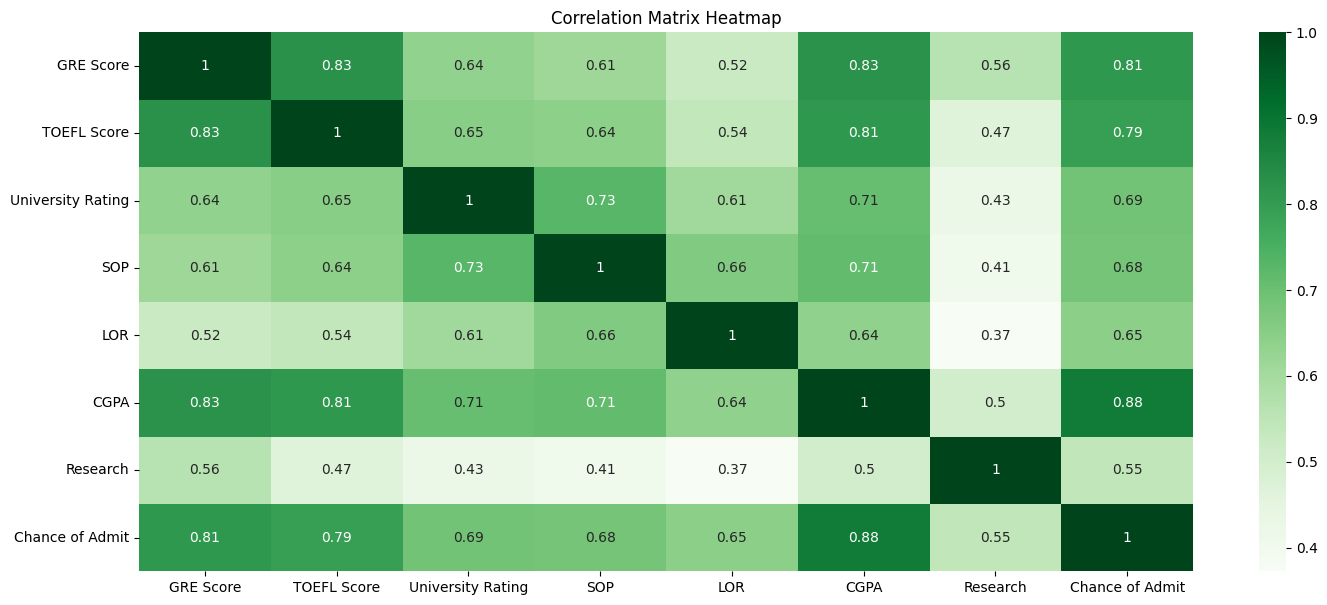

In [ ]:
# Correlation matrix and heatmap
corr_matrix = data.corr()
plt.figure(figsize=(17, 7))
sns.heatmap(corr_matrix, annot=True, cmap='Greens')
plt.title('Correlation Matrix Heatmap')
plt.show()

**🔍OBSERVATION🔎**
- There is a strong positive (above 0.80) correlation between,
    - CGPA Vs Chance of Admit - 1st Highest correlation
    - GRE Score Vs Chance of Admit - 2nd Highest correlation
    - TOEFL Score Vs Chance of Admit - 3rd Highest correlation
    - GRE Score Vs CGPA
    - TOEFL Score Vs CGPA
    - TOEFL Score Vs GRE Score



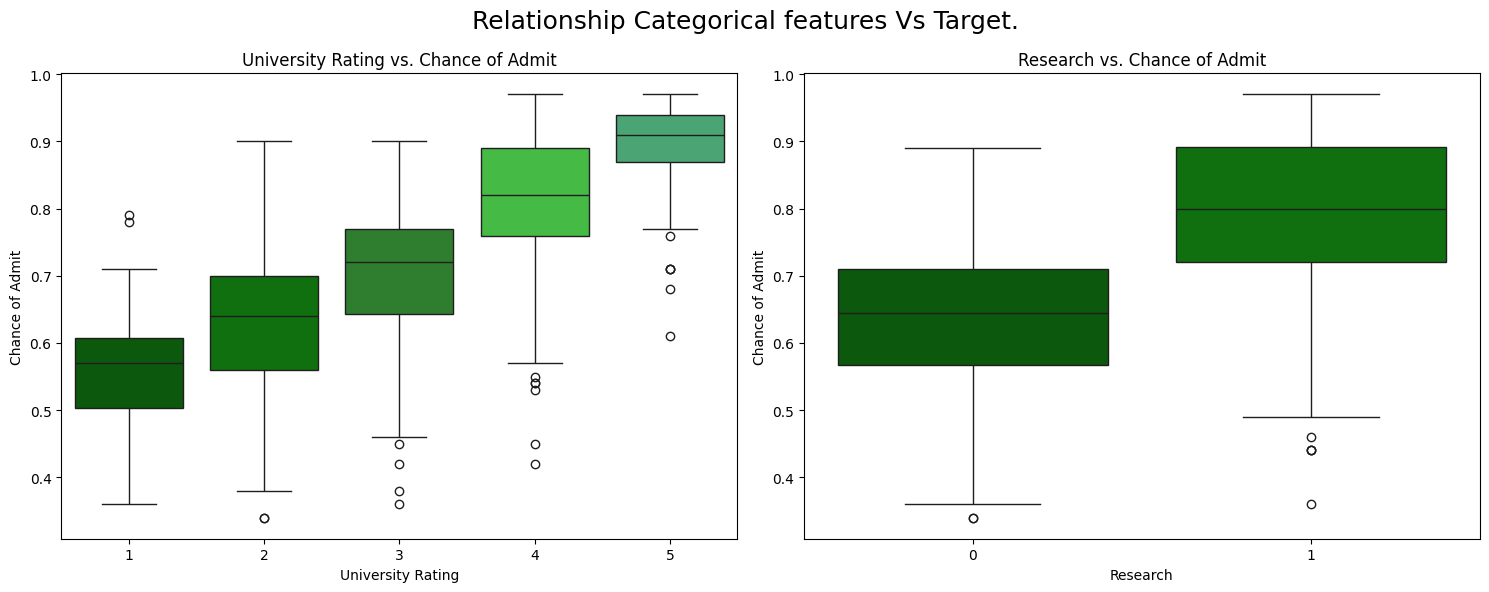

In [ ]:
# Relationship Categorical features Vs Target
green_palette = ['#006400', '#008000', '#228B22', '#32CD32', '#3CB371', '#66CDAA', '#7FFF00', '#00FF7F', '#98FB98', '#ADFF2F']

plt.figure(figsize=(15, 6))

for i, elem in enumerate(categorical_cols):
  plt.subplot(1, 2, i+1)
  sns.boxplot(x=elem, y='Chance of Admit', data=data, palette=green_palette)
  plt.title(f"{elem} vs. Chance of Admit")

plt.suptitle("Relationship Categorical features Vs Target.", fontsize = 18)
plt.tight_layout()
plt.show()

**🔍OBSERVATION🔎**
- As the University Ratings increases, the Chance of Admit is also increasing.
- If the person have research experiance, the Chance of Admit is high.

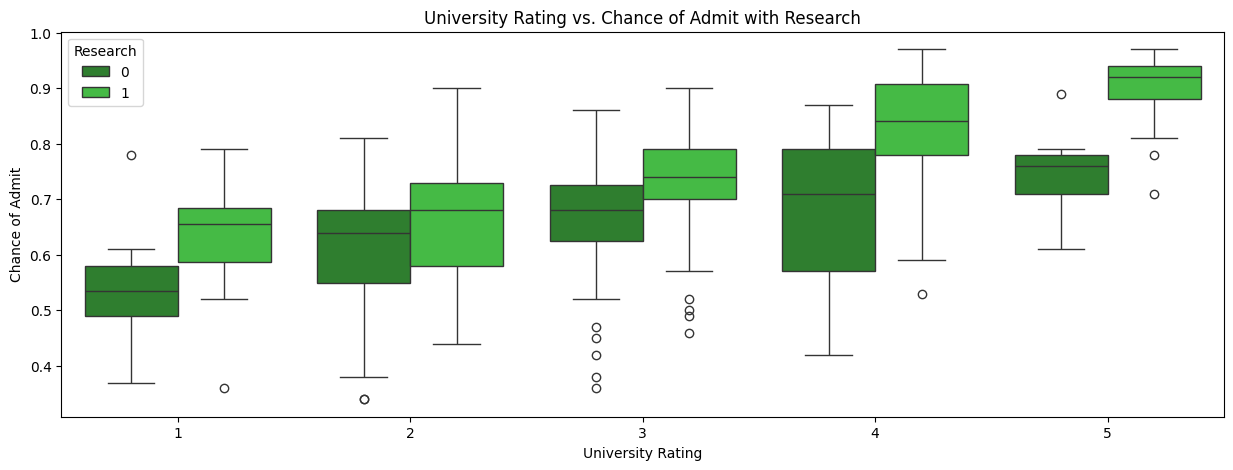

In [ ]:
# University Rating vs. Chance of Admit with Research
plt.figure(figsize=(15, 5))
sns.boxplot(x='University Rating', y='Chance of Admit', hue='Research' ,data=data, palette=['#228B22', '#32CD32'])
plt.title("University Rating vs. Chance of Admit with Research")
plt.show()

**🔍OBSERVATION🔎**

The difference between the chance of Admit is high for research and Non research experisnce for the University Ratung 5.

## **7) Data preprocessing🎰**

### <font color="green">**7.1) Check for duplicate records⏺**</font>

In [ ]:
# Check if there are any duplicate records
data.loc[data.duplicated()]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


**🔍OBSERVATION🔎**

- There is no duplicate records.

### <font color="green">**7.2) Check for missing values🔎**</font>

In [ ]:
# Check if there are any missing values
data.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

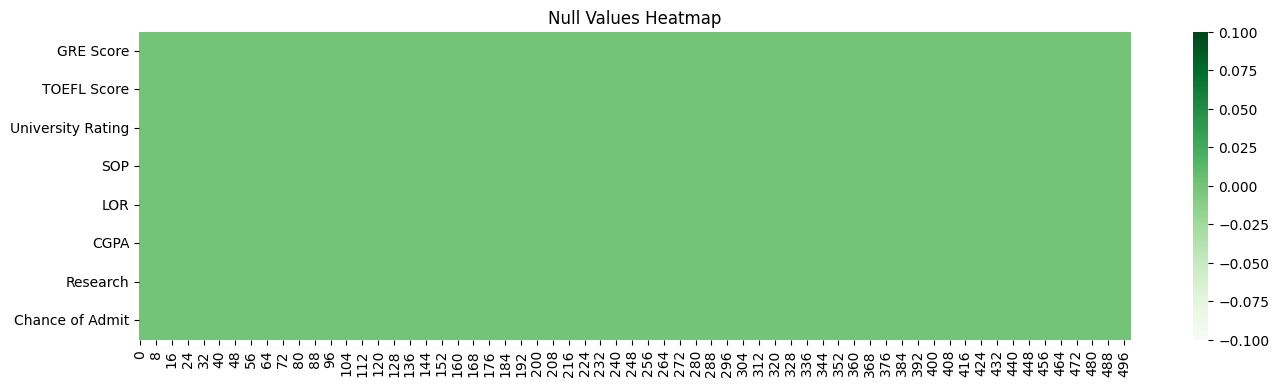

In [ ]:
# Null value heatmap:
plt.figure(figsize = (16,4))
sns.heatmap(data.isnull().T, cmap='Greens')
plt.title('Null Values Heatmap')
plt.show()

**🔍OBSERVATION🔎**

- There is no missing values.

### <font color="green">**7.3) Check for outlier values🕵**</font>

#### <font color="lightgreen">**7.3.1) Visualization Method**</font>

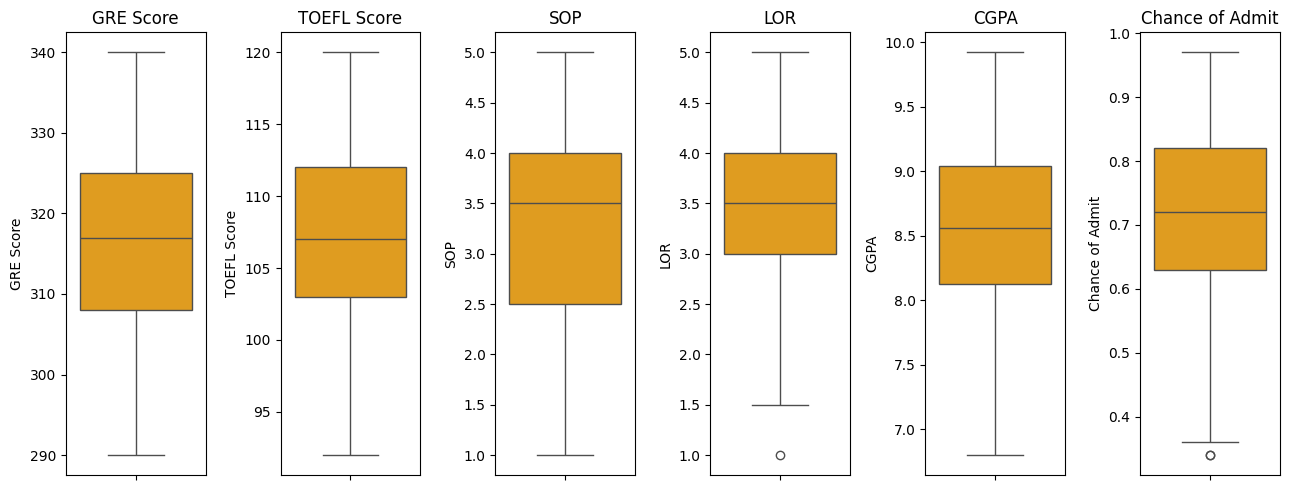

In [ ]:
# Box plots for numerical columns
palette = ['#32CD32']
plt.figure(figsize=(13, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i+1)
    sns.boxplot(data[col],color="orange")
    plt.title(col)
plt.tight_layout()
plt.show()

#### <font color="lightgreen">**7.3.2) Z-Score Method**</font>

In [ ]:
# Since the distribution of numerical features are almost normal for all columns we can go with Z Score
from scipy import stats
z_score = stats.zscore(numerical_df)
data[((z_score < -3) | (z_score > 3)).any(axis=1)]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


**🔍OBSERVATION🔎**
- From the above output we can say that there is no outliers using Z-Score method.
- Lets check with IQR Method as well.

#### <font color="lightgreen">**7.3.3) IQR Method**</font>

In [ ]:
# Sum of outliers in each column
# Function to detect outliers using the IQR method
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
    return outliers

# outliers for each numerical column
outliers_gre = detect_outliers_iqr(data['GRE Score'])
outliers_toefl = detect_outliers_iqr(data['TOEFL Score'])
outliers_sop = detect_outliers_iqr(data['SOP'])
outliers_lor = detect_outliers_iqr(data['LOR'])
outliers_cgpa = detect_outliers_iqr(data['CGPA'])
outliers_admit = detect_outliers_iqr(data['Chance of Admit'])

# Combine outlier information into a DataFrame
outliers_combined = pd.DataFrame({
    'GRE Score': outliers_gre,
    'TOEFL Score': outliers_toefl,
    'SOP': outliers_sop,
    'LOR': outliers_lor,
    'CGPA': outliers_cgpa,
    'Chance of Admit': outliers_admit
})

# Check the number of outliers in each column
outliers_combined.sum()

GRE Score          0
TOEFL Score        0
SOP                0
LOR                1
CGPA               0
Chance of Admit    2
dtype: int64

In [ ]:
# Outlier value in LOR column
data.loc[outliers_lor]['LOR']

347    1.0
Name: LOR, dtype: float64

In [ ]:
# Outlier value in Chance of Admit column
data.loc[outliers_admit]['Chance of Admit']

92     0.34
376    0.34
Name: Chance of Admit, dtype: float64

In [ ]:
# Calculating the five point summery and Percentage of outliers for each numerical column
def detect_outliers(column):
  # Calculating the IQR:
  Q1 = np.percentile(data[column],25)
  median = np.percentile(data[column],50)
  Q3 = np.percentile(data[column],75)
  IQR = Q3 - Q1

  # Calculating the percentage of outliers:
  lower_bound = max(data[column].min(), Q1 - 1.5 * IQR)
  upper_bound = min(data[column].max(), Q3 + 1.5 * IQR)
  outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
  percentage_outliers = (len(outliers)/len(data)) * 100
  print(f"For columns: {col}")
  print(f"Lower bound value: {lower_bound.round(2)} \nQ1: {Q1.round(2)} \nMedian: {median.round(2)} \nQ3: {Q3.round(2)} \nUpper bound value: {upper_bound.round(2)} \nIQR: {IQR.round(2)}")
  return percentage_outliers

# UIterating the numerical columns:
for col in numerical_cols:
    percentage = detect_outliers(col)
    print(f"Percentage of outliers in column '{col}': {percentage:.2f}%")
    print("-" * 60)

For columns: GRE Score
Lower bound value: 290 
Q1: 308.0 
Median: 317.0 
Q3: 325.0 
Upper bound value: 340 
IQR: 17.0
Percentage of outliers in column 'GRE Score': 0.00%
------------------------------------------------------------
For columns: TOEFL Score
Lower bound value: 92 
Q1: 103.0 
Median: 107.0 
Q3: 112.0 
Upper bound value: 120 
IQR: 9.0
Percentage of outliers in column 'TOEFL Score': 0.00%
------------------------------------------------------------
For columns: SOP
Lower bound value: 1.0 
Q1: 2.5 
Median: 3.5 
Q3: 4.0 
Upper bound value: 5.0 
IQR: 1.5
Percentage of outliers in column 'SOP': 0.00%
------------------------------------------------------------
For columns: LOR
Lower bound value: 1.5 
Q1: 3.0 
Median: 3.5 
Q3: 4.0 
Upper bound value: 5.0 
IQR: 1.0
Percentage of outliers in column 'LOR': 0.20%
------------------------------------------------------------
For columns: CGPA
Lower bound value: 6.8 
Q1: 8.13 
Median: 8.56 
Q3: 9.04 
Upper bound value: 9.92 
IQR: 0.91
P

**🔍OBSERVATION🔎**
- The column LOR has 0.20% of data as outliers but the value is in the scale of 1-5
- The column Chance of Admit has 0.40% data as outliers.
- Since there are very minimum outliers in the dataset, we are not going to treat them.

## **8) Prepare the data for modeling✅**

### <font color="green">**8.1) Encoding💻**</font>

In [ ]:
# Display the categorical columns
data[categorical_cols].head()

,University Rating,Research
0,4,1
1,4,1
2,3,1
3,3,1
4,2,0


In [ ]:
# Details about the catgorical columns
for elem in categorical_cols:
  print(f"{elem}: {data[elem].unique()}")
  print()

University Rating: [4, 3, 2, 5, 1]
Categories (5, int64): [1, 2, 3, 4, 5]

Research: [1, 0]
Categories (2, int64): [0, 1]



**🔍OBSERVATION🔎**
- Since the data is already numerical there is no need of encoding.

In [ ]:
# Convert data types again to integer
data['University Rating'] = data['University Rating'].astype(int)
data['Research'] = data['Research'].astype(int)

In [ ]:
print("Data types of each column:")
print("-" * 27)
data.dtypes

Data types of each column:
---------------------------


GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

### <font color="green">**8.2) Train-Test-Split**</font> ✂

In [ ]:
# Lets split the data into Independent feature and dependent feature
y = data['Chance of Admit']
X = data.drop('Chance of Admit', axis=1)
X.shape, y.shape

((500, 7), (500,))

In [ ]:
# Lets split the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Cross check
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
249,321,111,3,3.5,4.0,8.83,1
433,316,111,4,4.0,5.0,8.54,0
19,303,102,3,3.5,3.0,8.50,0
322,314,107,2,2.5,4.0,8.27,0
332,308,106,3,3.5,2.5,8.21,1


In [ ]:
# Lets check the shape of train and test data
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (400, 7)
Shape of y_train: (400,)
Shape of X_test: (100, 7)
Shape of y_test: (100,)


### <font color="green">**8.3) Feature scaling📏**</font>

Lets do **Standardization (Z-score Scaling)** since our data exhibits a near-normal distribution.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # Train data is fit and transformed
X_test = scaler.transform(X_test) # Test data is only transformed

In [ ]:
# X_train is converted to np array
X_train

array([[ 0.38998634,  0.6024183 , -0.09829757, ...,  0.56498381,
         0.4150183 ,  0.89543386],
       [-0.06640493,  0.6024183 ,  0.7754586 , ...,  1.65149114,
        -0.06785154, -1.11677706],
       [-1.25302222, -0.87691722, -0.09829757, ..., -0.52152352,
        -0.13445427, -1.11677706],
       ...,
       [-1.34430047, -1.37002906, -1.8458099 , ..., -1.60803084,
        -2.2157898 , -1.11677706],
       [-0.7053527 , -0.38380538, -0.97205374, ...,  0.56498381,
        -1.49981038, -1.11677706],
       [-0.24896144, -0.21943477, -0.97205374, ...,  0.02173015,
        -0.55072138, -1.11677706]])

In [ ]:
# Lets convert the X_train to a dataframe
df_train = pd.DataFrame(X_train, columns = data.columns[:-1])
df_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.389986,0.602418,-0.098298,0.126796,0.564984,0.415018,0.895434
1,-0.066405,0.602418,0.775459,0.633979,1.651491,-0.067852,-1.116777
2,-1.253022,-0.876917,-0.098298,0.126796,-0.521524,-0.134454,-1.116777
3,-0.248961,-0.055064,-0.972054,-0.887570,0.564984,-0.517420,-1.116777
4,-0.796631,-0.219435,-0.098298,0.126796,-1.064777,-0.617324,0.895434


In [ ]:
# Check the shape
df_train.shape

(400, 7)

In [ ]:
# Lets convert the X_test to a dataframe
df_test = pd.DataFrame(X_test, columns = data.columns[:-1])
df_test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.576604,1.424271,0.775459,0.633979,0.021730,1.597217,0.895434
1,-0.248961,0.109306,0.775459,1.141162,0.564984,0.764683,0.895434
2,-0.157683,-0.383805,-0.972054,-1.394754,-1.064777,-1.549762,-1.116777
3,-0.431518,0.273677,-0.098298,-0.380387,-0.521524,0.181909,-1.116777
4,0.846378,0.766789,-0.098298,0.126796,-0.521524,0.781333,0.895434


In [ ]:
# Check the shape
df_test.shape

(100, 7)

## **9) Model Building🔷**

### <font color="green">**9.1) Linear Regression implementation**</font>🖥

In [ ]:
# Import the required library
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
LR_model = LinearRegression()

# Train the model
LR_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicting values for the test data
y_pred_train = LR_model.predict(X_train)
y_pred_test = LR_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model
def evaluate_model_performance(y_true, y_forecast, model):

    # Calculate MSE
    mse = mean_squared_error(y_true, y_forecast)

    # Calculate MAE
    mae = mean_absolute_error(y_true, y_forecast)

    # Calculate RMSE
    rmse = np.sqrt(mse)

    # Calculate R-squared
    r2 = r2_score(y_true, y_forecast)

    # Number of observations
    n = len(y_true)

    # Number of predictors (features)
    p = model.n_features_in_

    # Calculate Adjusted R-squared
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    # Return all metrics in a dictionary
    return print(f"MSE: {mse.round(4)}\nMAE: {mae.round(4)}\nRMSE: {rmse.round(4)}\nR-squared: {r2.round(2)}\nAdjusted R-squared: {adjusted_r2.round(2)}")

In [ ]:
# Performance of Linear Regression
print("Performance of Linear Regression")
print("-"*36)
# Metrix for train and test data
print("Performance of Train data")
print("-"*26)
evaluate_model_performance(y_train, y_pred_train, LR_model)
print()
print("Performance of Test data")
print("-"*26)
evaluate_model_performance(y_test, y_pred_test, LR_model)

Performance of Linear Regression
------------------------------------
Performance of Train data
--------------------------
MSE: 0.0035
MAE: 0.0425
RMSE: 0.0594
R-squared: 0.82
Adjusted R-squared: 0.82

Performance of Test data
--------------------------
MSE: 0.0037
MAE: 0.0427
RMSE: 0.0609
R-squared: 0.82
Adjusted R-squared: 0.81


**🔍OBSERVATION🔎**
- The model shows strong performance on both the training and test data, with R-squared values of 0.82 and 0.81 respectively.
- The low MAE, MSE, and RMSE values indicate that the predictions are close to the actual values.

In [ ]:
# Coefficients and intercept
coefficients_df = pd.DataFrame(LR_model.coef_.reshape(1,-1), columns=data.columns[:-1])
coefficients_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.026671,0.018226,0.00294,0.001788,0.015866,0.067581,0.01194


In [ ]:
# Intercept
LR_model.intercept_

0.7241749999999999

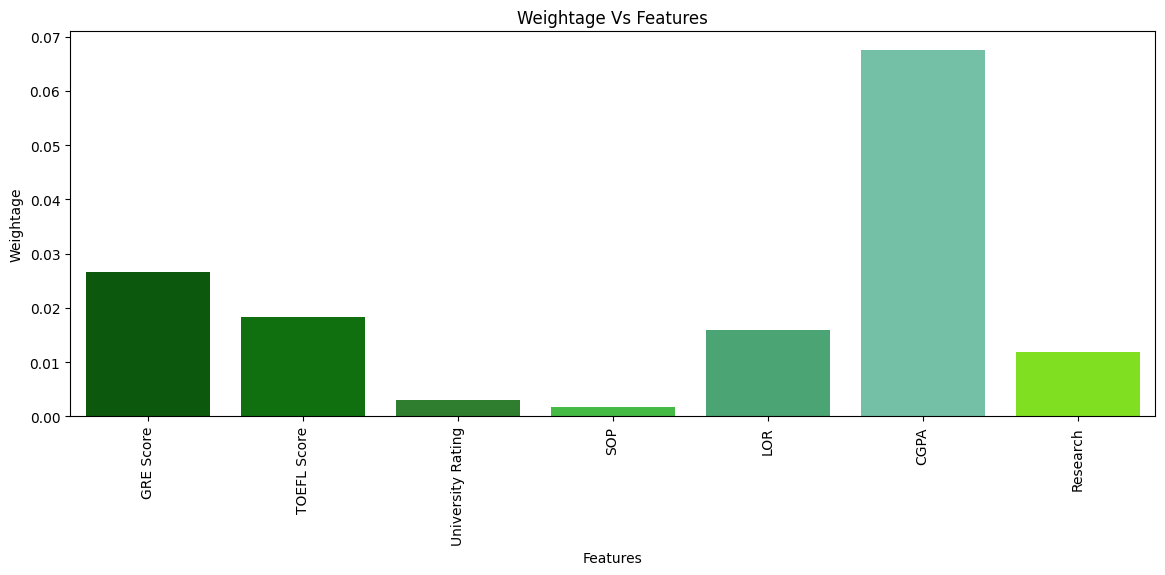

In [ ]:
# Weightage Vs Features
green_palette = ['#006400', '#008000', '#228B22', '#32CD32', '#3CB371', '#66CDAA', '#7FFF00', '#00FF7F', '#98FB98', '#ADFF2F']

plt.figure(figsize=(14, 5))

sns.barplot(x=coefficients_df.columns, y=coefficients_df.iloc[0], palette=green_palette)
plt.title('Weightage Vs Features')
plt.xlabel('Features')
plt.ylabel('Weightage')
plt.xticks(rotation=90)
plt.show()

**🔍OBSERVATION🔎**
- The feature CGPA has the highest weightage among all other features followed by GRE Score and TOEFL Score.

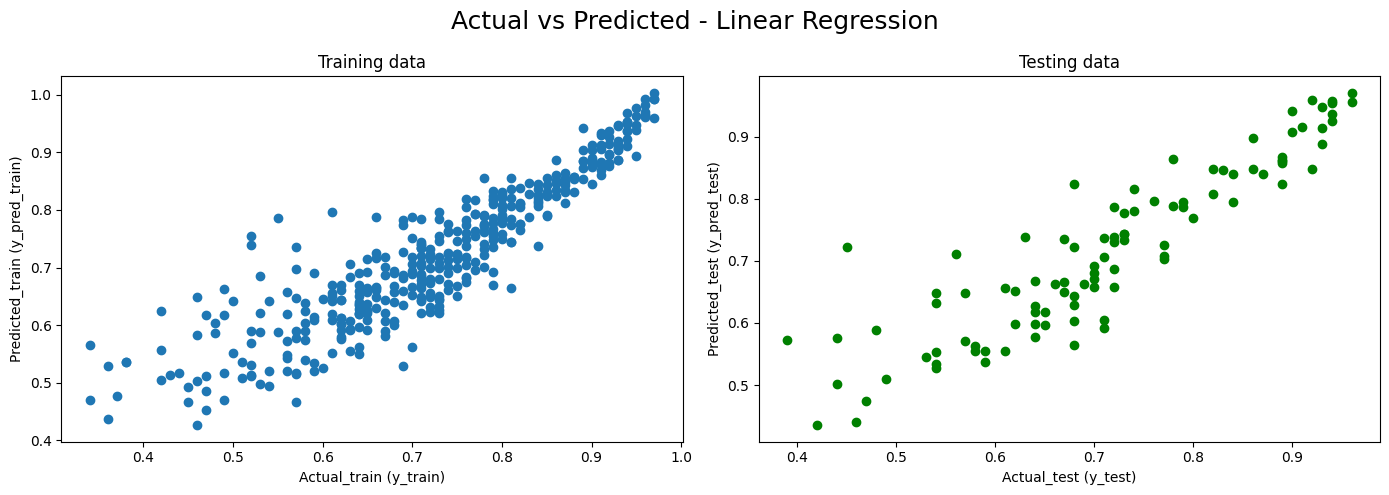

In [ ]:
# Actual vs Predicted
plt.figure(figsize=(14, 5))

# Actual vs Predicted Plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train)
plt.xlabel('Actual_train (y_train)')
plt.ylabel('Predicted_train (y_pred_train)')
plt.title('Training data')

# Actual vs Predicted Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test, color="green")
plt.xlabel('Actual_test (y_test)')
plt.ylabel('Predicted_test (y_pred_test)')
plt.title('Testing data')

plt.suptitle("Actual vs Predicted - Linear Regression", fontsize = 18)
plt.tight_layout()
plt.show()

**🔍OBSERVATION🔎**

- The points are closely aligned along the diagonal line y = x, indicating that the model's predictions are fairly accurate for both training and testing data.

### <font color="green">**9.2) Linear Regression using OLS📑**</font>

In [ ]:
import statsmodels.api as sm

X_sm = sm.add_constant(X_train)  # Statmodels default is without intercept, to add intercept we need to add constant.

model = sm.OLS(y_train, X_sm)
results = model.fit()

# Print the summary statistics of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Wed, 17 Jul 2024   Prob (F-statistic):          3.41e-142
Time:                        06:06:53   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7242      0.003    241.441      0.0

### <font color="green">**9.3) Test the assumptions of linear regression**</font>🔠



#### <font color="lightgreen">**9.3.1) Multicollinearity check by VIF score**</font>

**VIF**

Variance Inflation Factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. It quantifies how much the variance of a regression coefficient is inflated due to multicollinearity with other predictors. A VIF value greater than 10 is typically considered indicative of high multicollinearity.

**Interpreting VIF Values**

- VIF = 1: No correlation between the predictor and other variables.
- 1 < VIF < 5: Moderate correlation.
- VIF > 5: High correlation, indicating multicollinearity, but sometimes  acceptable depending on the context.
- VIF > 10: Very high correlation, indicating a serious multicollinearity problem that needs to be addressed.

In [ ]:
# Display the train scalled data in the form of data frame
df_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.389986,0.602418,-0.098298,0.126796,0.564984,0.415018,0.895434
1,-0.066405,0.602418,0.775459,0.633979,1.651491,-0.067852,-1.116777
2,-1.253022,-0.876917,-0.098298,0.126796,-0.521524,-0.134454,-1.116777
3,-0.248961,-0.055064,-0.972054,-0.887570,0.564984,-0.517420,-1.116777
4,-0.796631,-0.219435,-0.098298,0.126796,-1.064777,-0.617324,0.895434


In [ ]:
# Deep copy of df_train
X_t = df_train.copy()
X_t.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.389986,0.602418,-0.098298,0.126796,0.564984,0.415018,0.895434
1,-0.066405,0.602418,0.775459,0.633979,1.651491,-0.067852,-1.116777
2,-1.253022,-0.876917,-0.098298,0.126796,-0.521524,-0.134454,-1.116777
3,-0.248961,-0.055064,-0.972054,-0.887570,0.564984,-0.517420,-1.116777
4,-0.796631,-0.219435,-0.098298,0.126796,-1.064777,-0.617324,0.895434


In [ ]:
# Import the required libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a empty data frame
vif = pd.DataFrame()

# Create Features column
vif['Features'] = X_t.columns

# Create VIF column
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)

# Display the VIF data frame
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,CGPA,4.65
0,GRE Score,4.49
1,TOEFL Score,3.66
3,SOP,2.79
2,University Rating,2.57
4,LOR,1.98
6,Research,1.52


**🔍OBSERVATION🔎**
- All VIF values are below the critical threshold of 5, indicating that there is no severe multicollinearity among the predictor variables.
- The highest VIF value is 4.65 for CGPA, which is still below the acceptable range


#### <font color="lightgreen">**9.3.2) Mean of residuals**</font>

The mean of the residuals in a linear regression model is a measure of how the residuals (the differences between the observed values and the predicted values) average out. In an ideal linear regression model, the mean of the residuals should be close to zero. This indicates that, on average, the predictions are accurate and the model is well-fitted.

In [ ]:
# Calculate residuals
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

# Mean of residuals
mean_residuals_train = np.mean(residuals_train)
mean_residuals_test = np.mean(residuals_test)

# Print the mean of residuals
print("Mean of residuals (train):", mean_residuals_train)
print("Mean of residuals (test):", mean_residuals_test)

Mean of residuals (train): 1.4419021532319221e-16
Mean of residuals (test): -0.005453623717661251


**🔍OBSERVATION🔎**
- The mean of residuals for the training data is extremely close to zero (1.44e-16). This suggests that the model has no systematic bias for the training data.
- The mean of residuals for the test data is -0.0054, which is very close to zero. This indicates that the model generalizes well to unseen data and there is no significant bias in the predictions for the test set.
- The near-zero mean of residuals for both training and test sets indicates that the linear regression model is well-fitted and unbiased.

#### <font color="lightgreen">**9.3.3) Linear relationship between independent & dependent variables**</font>

Linear regression assumes that there is a linear relationship between the independent variables (predictors) and the dependent variable (response). This means that changes in the dependent variable are proportional to changes in the independent variables.

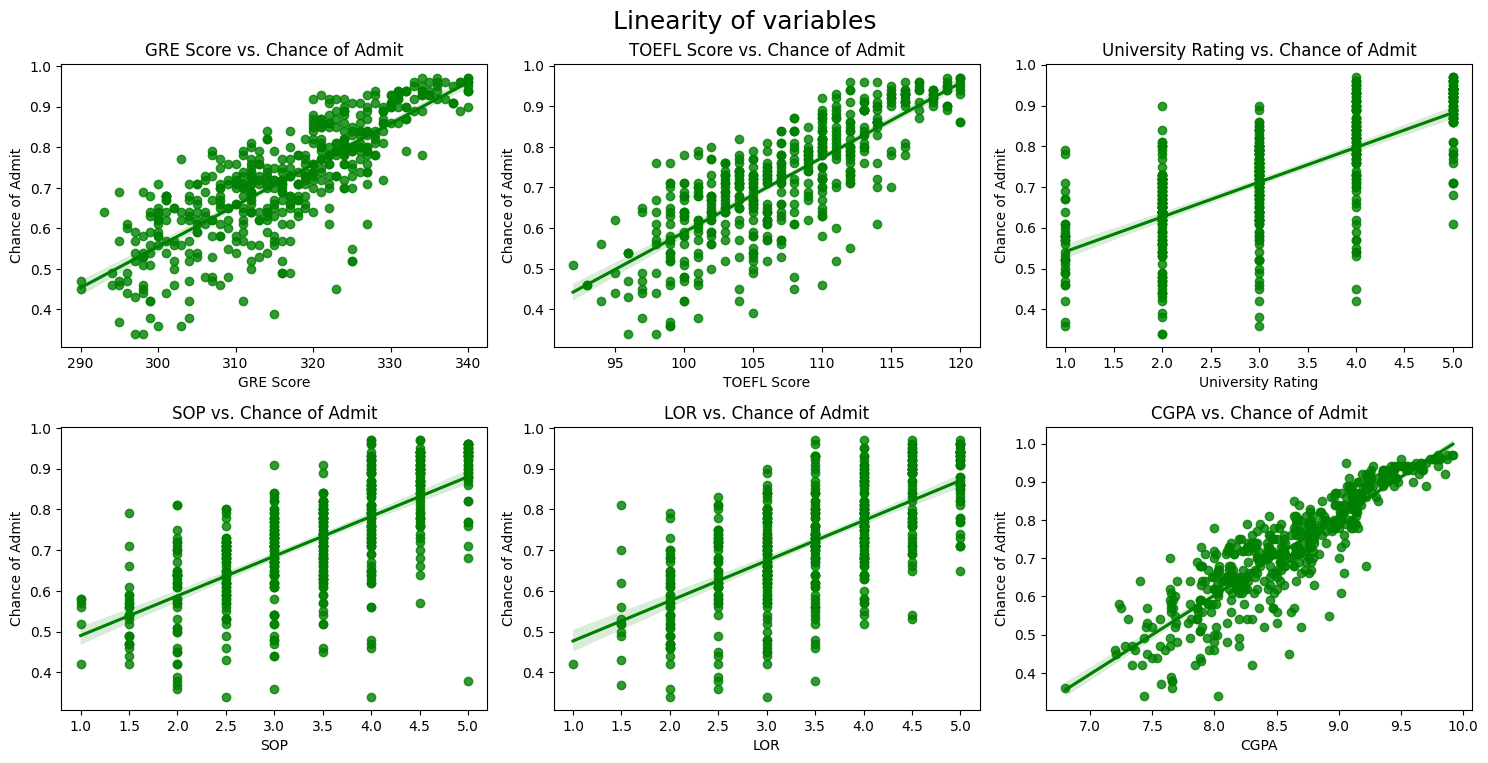

In [ ]:
# Linearity of variables
numerical_cols_except_target = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA']

plt.figure(figsize=(15, 11))
for i, elem in enumerate(numerical_cols_except_target):
  plt.subplot(3, 3, i+1)
  sns.regplot(x=elem, y='Chance of Admit', data=data, color="green")
  plt.title(f"{elem} vs. Chance of Admit")

plt.suptitle("Linearity of variables", fontsize = 18)
plt.tight_layout()
plt.show()

**🔍OBSERVATION🔎**
- All independent variables show a positive linear relationship with the chance of admission. This means that as each variable increases, the chance of admission also tends to increase.
- The presence of these linear trends supports the assumption of linearity in the linear regression model. However, the strength of linearity varies among different predictors.

#### <font color="lightgreen">**9.3.4) Test for Homoscedasticity**</font>

Homoscedasticity refers to the assumption that the variance of the errors (residuals) is constant across all levels of the independent variables. In the context of linear regression, this means that the spread of the residuals should be roughly the same for all predicted values. Homoscedasticity is important because it ensures that the model's predictions are equally reliable across all values of the independent variables. When the assumption of homoscedasticity is violated (a condition known as heteroscedasticity), the standard errors of the coefficients can be biased, leading to incorrect conclusions about the relationships between variables.

To test for homoscedasticity, there are several graphical and statistical methods that you can use:

- Residual plot: Plot the residuals against the predicted values or the independent variables. Look for any systematic patterns or trends in the spread of the residuals. If the spread appears to be consistent across all levels of the predictors, then homoscedasticity is likely met.

- Goldfeld-Quandt Test: This test is used when you suspect heteroscedasticity due to different variances in different parts of the data. It involves splitting the data into two subsets based on a specific criterion and then comparing the variances of the residuals in each subset. If the difference in variances is not significant, it suggests homoscedasticity.

It's important to note that the visual inspection of plots is often the first step to identify potential violations of homoscedasticity. Statistical tests can provide additional evidence, but they may have assumptions or limitations that need to be considered.

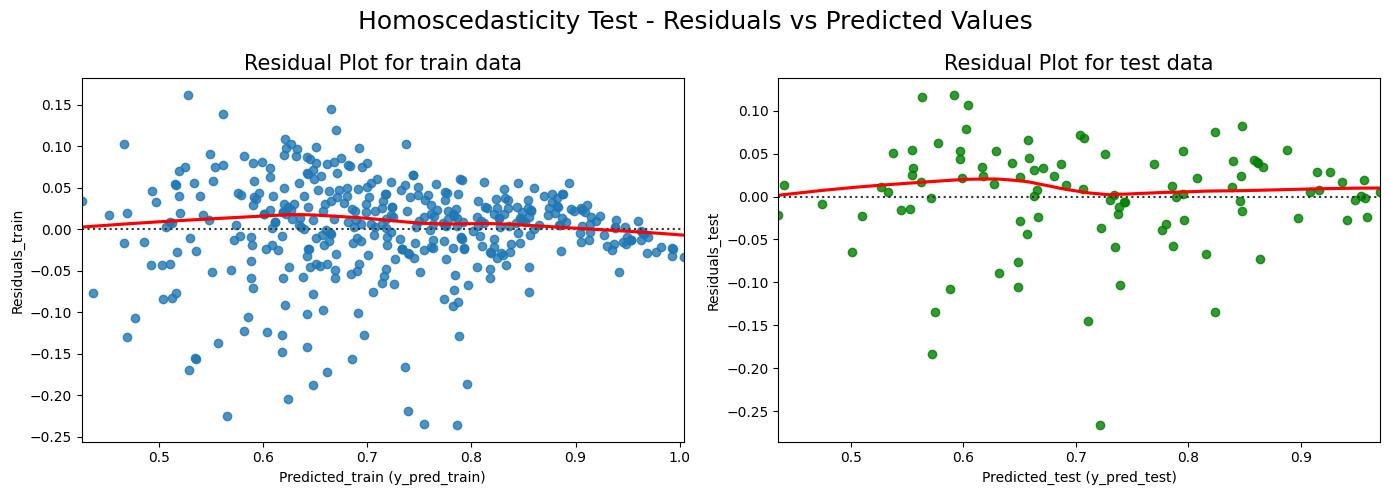

In [ ]:
# Assuming y_train, y_pred_train, y_test, and y_pred_test are already defined
plt.figure(figsize=(14, 5))

# Residual Plot for train data
plt.subplot(1, 2, 1)
loss_train = y_train - y_pred_train
sns.residplot(x=y_pred_train, y=loss_train, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Predicted_train (y_pred_train)')
plt.ylabel('Residuals_train')
plt.title('Residual Plot for train data', fontsize=15)

# Residual Plot for test data
plt.subplot(1, 2, 2)
loss_test = y_test - y_pred_test
sns.residplot(x=y_pred_test, y=loss_test, lowess=True, color="green", line_kws={'color': 'red'})
plt.xlabel('Predicted_test (y_pred_test)')
plt.ylabel('Residuals_test')
plt.title('Residual Plot for test data', fontsize=15)

plt.suptitle("Homoscedasticity Test - Residuals vs Predicted Values", fontsize=18)
plt.tight_layout()
plt.show()

**🔍OBSERVATION🔎**

**For Train data**

- Pattern in Residuals:

    - The residuals is randomly scattered around the horizontal axis (y = 0), indicating that the model captures the underlying data pattern well.
    - There is a clear pattern (such as a curve), it may indicate non-linearity.
- Homoscedasticity:
    - The residuals gather in certain areas, it indicates there may be  heteroscedasticity, meaning the variance of the errors is not constant, which may affect the model's predictions.
    
**For Test data**

- Pattern in Residuals:

    - The residuals is randomly scattered around the horizontal axis (y = 0), indicating that the model captures the underlying data pattern well.
    - There is a clear pattern (such as a curve), it may indicate non-linearity.
- Homoscedasticity:
    - The spread of residuals remains consistent across all levels of predicted values indicating homoscedasticity, meaning the variance of the errors constant.

In [ ]:
# Import the library
from statsmodels.stats.diagnostic import het_goldfeldquandt

# Perform Goldfeld-Quandt test for train data
gq_test = het_goldfeldquandt(y_train, X_train)
f_statistic = gq_test[0]
p_value = gq_test[1]

# Print the results
print("Goldfeld-Quandt test F-statistic:", f_statistic)
print("Goldfeld-Quandt test p-value:", p_value)

# Interpretation
if p_value > 0.05:
    print("There is no strong evidence of heteroscedasticity. Homoscedasticity is validated.")
else:
    print("There is strong evidence of heteroscedasticity.")

Goldfeld-Quandt test F-statistic: 1.0029318358365393
Goldfeld-Quandt test p-value: 0.4918984144278115
There is no strong evidence of heteroscedasticity. Homoscedasticity is validated.


In [ ]:
# Import the library
from statsmodels.stats.diagnostic import het_goldfeldquandt

# Perform Goldfeld-Quandt test for test data
gq_test = het_goldfeldquandt(y_test, X_test)
f_statistic = gq_test[0]
p_value = gq_test[1]

# Print the results
print("Goldfeld-Quandt test F-statistic:", f_statistic)
print("Goldfeld-Quandt test p-value:", p_value)

# Interpretation
if p_value > 0.05:
    print("There is no strong evidence of heteroscedasticity. Homoscedasticity is validated.")
else:
    print("There is strong evidence of heteroscedasticity.")

Goldfeld-Quandt test F-statistic: 1.2278089004946002
Goldfeld-Quandt test p-value: 0.2519350659398718
There is no strong evidence of heteroscedasticity. Homoscedasticity is validated.


**🔍OBSERVATION🔎**

- Since the p-value is greater than 0.05, we conclude that there is no strong evidence of heteroscedasticity in the dataset. This implies that the assumption of constant variance of residuals (homoscedasticity) holds for our linear regression model.

#### <font color="lightgreen">**9.3.5) Normality of residuals**</font>

Normality of residuals refers to the assumption that the residuals (or errors) in a statistical model are normally distributed. Residuals are the differences between the observed values and the predicted values from the model.

The assumption of normality is important in many statistical analyses because it allows for the application of certain statistical tests and the validity of confidence intervals and hypothesis tests. When residuals are normally distributed, it implies that the errors are random, unbiased, and have consistent variability.

**To check for the normality of residuals, you can follow these steps:**

- **Residual Histogram:** Create a histogram of the residuals and visually inspect whether the shape of the histogram resembles a bell-shaped curve. If the majority of the residuals are clustered around the mean with a symmetric distribution, it suggests normality.

- **Q-Q Plot** (Quantile-Quantile Plot): This plot compares the quantiles of the residuals against the quantiles of a theoretical normal distribution. If the points in the Q-Q plot are reasonably close to the diagonal line, it indicates that the residuals are normally distributed. Deviations from the line may suggest departures from normality.

- **Shapiro-Wilk Test:** This is a statistical test that checks the null hypothesis that the residuals are normally distributed. The Shapiro-Wilk test calculates a test statistic and provides a p-value. If the p-value is greater than the chosen significance level (e.g., 0.05), it suggests that the residuals follow a normal distribution. However, this test may not be reliable for large sample sizes. **Anderson-Darling or Jarque_Bera** can also be done as data size increases


In [ ]:
# Calculate residuals
train_residuals = y_train - y_pred_train
test_residuals = y_test - y_pred_test

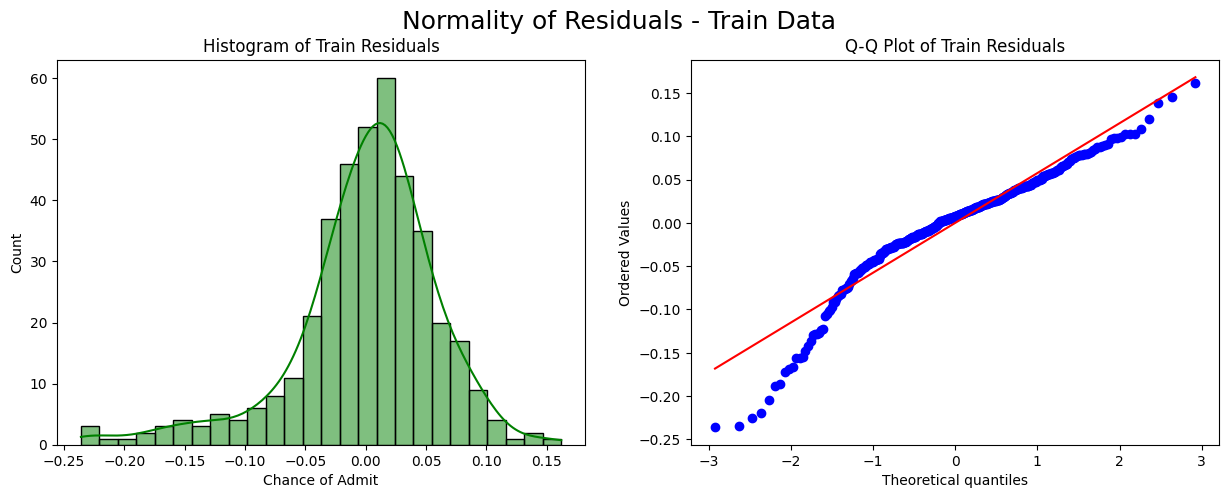

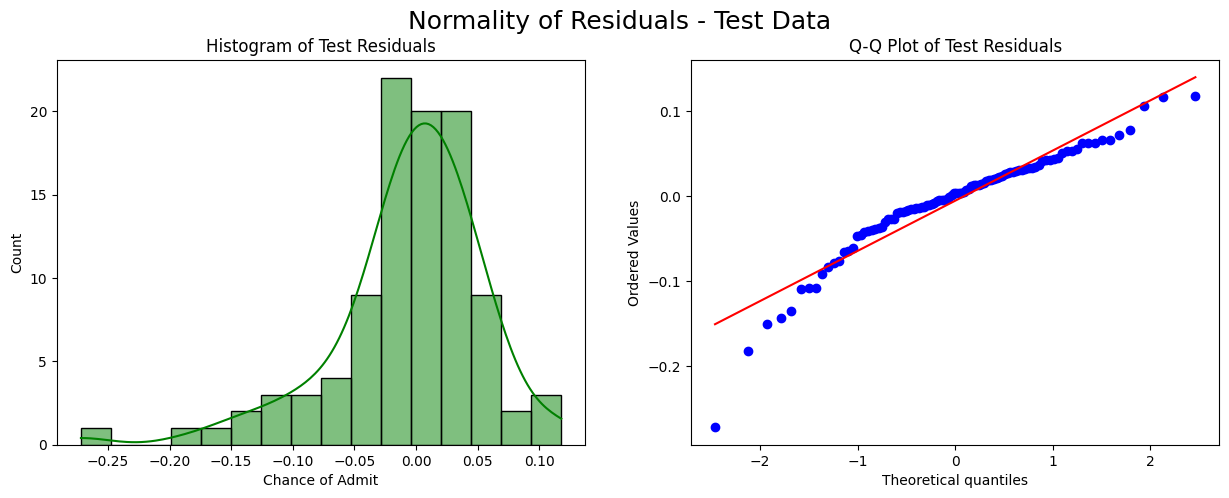

In [ ]:
# Plot histogram and Q-Q plot for train residuals
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(train_residuals, kde=True, color='green')
plt.title('Histogram of Train Residuals')

plt.subplot(1, 2, 2)
stats.probplot(train_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Train Residuals')

plt.suptitle('Normality of Residuals - Train Data', fontsize=18)
plt.show()

# Plot histogram and Q-Q plot for test residuals
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(test_residuals, kde=True, color='green')
plt.title('Histogram of Test Residuals')

plt.subplot(1, 2, 2)
stats.probplot(test_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Test Residuals')

plt.suptitle('Normality of Residuals - Test Data', fontsize=18)
plt.show()

In [ ]:
# Shapiro-Wilk Test for normality
import scipy.stats as stats

# H0: Data is Gaussian
# Ha: Data is not Gaussian

shapiro_train = stats.shapiro(train_residuals)
shapiro_test = stats.shapiro(test_residuals)

print(f'Shapiro-Wilk Test for Train Residuals: Statistic={shapiro_train.statistic}, p-value={shapiro_train.pvalue}')

if shapiro_train.pvalue > 0.05:
    print("Train Data is Gaussian (fail to reject H0)")
else:
    print("Train Data is not Gaussian (reject H0)")

print()

print(f'Shapiro-Wilk Test for Test Residuals: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')

if shapiro_test.pvalue > 0.05:
    print("Test Data is Gaussian (fail to reject H0)")
else:
    print("Test Data is not Gaussian (reject H0)")

Shapiro-Wilk Test for Train Residuals: Statistic=0.9291010499000549, p-value=7.73526370994454e-13
Train Data is not Gaussian (reject H0)

Shapiro-Wilk Test for Test Residuals: Statistic=0.9178698658943176, p-value=1.0869382094824687e-05
Test Data is not Gaussian (reject H0)


In [ ]:
# Anderson-Darling Test for normality
from statsmodels.stats.diagnostic import normal_ad

# H0: Data is Gaussian
# Ha: Data is not Gaussian

anderson_train = normal_ad(train_residuals)
anderson_test = normal_ad(test_residuals)

print(f'Anderson-Darling Test for Train Residuals: Statistic={anderson_train[0]}, p-value={anderson_train[1]}')

if anderson_train[1] > 0.05:
    print("Train Data is Gaussian (fail to reject H0)")
else:
    print("Train Data is not Gaussian (reject H0)")

print()

print(f'Anderson-Darling Test for Test Residuals: Statistic={anderson_test[0]}, p-value={anderson_test[1]}')
if  anderson_test[1] > 0.05:
    print("Test Data is Gaussian (fail to reject H0)")
else:
    print("Test Data is not Gaussian (reject H0)")

Anderson-Darling Test for Train Residuals: Statistic=7.357345909096807, p-value=5.303849926227439e-18
Train Data is not Gaussian (reject H0)

Anderson-Darling Test for Test Residuals: Statistic=2.1093362831425537, p-value=2.128546023452642e-05
Test Data is not Gaussian (reject H0)


**🔍OBSERVATION🔎**

- The Shapiro-Wilk test and Anderson-Darling Test indicates that the residuals from the training and testing data do not follow a Gaussian distribution.

### <font color="green">**9.4) Polynomial Regression💹**</font>

#### <font color="lightgreen">**9.4.1) Find the best degree**</font>

In [ ]:
# Function for Adj. R2 Score
def adj_r(r_sq,X,Y):
  adj_r1 = (1 - ((1-r_sq)*(len(Y)-1)) / (len(Y)-X.shape[1]-1))
  return adj_r1

def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y- y.mean())**2)
    score = (1- num/denom)
    return score

In [ ]:
# Creating a pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

degrees = 4
train_scores = []
test_scores = []

train_loss = []
test_loss = []

for degree in range(1, degrees):
    # Putting the classes like PolynomialFeatures(), StandardScaler(), LinearRegression() into a pipeline
    polyreg_scaled = make_pipeline(PolynomialFeatures(degree), StandardScaler(), LinearRegression())
    polyreg_scaled.fit(X_train, y_train)

    # Calculate R2 Score for train and test data
    train_score = polyreg_scaled.score(X_train, y_train) # R2 TRAIN
    test_score = polyreg_scaled.score(X_test, y_test) # R2 TEST

    # Calculate Adj. R2 Score for train and test data
    train_scores.append(adj_r(train_score,X_train,y_train))
    test_scores.append(adj_r(test_score,X_test,y_test))

    # Calculate the y_pred for train and test data
    output1 = polyreg_scaled.predict(X_train)
    output2 = polyreg_scaled.predict(X_test)

    # Calculate the MSE for train and test data
    train_loss.append(mean_squared_error(y_train,output1)) # MSE train
    test_loss.append(mean_squared_error(y_test,output2)) # MSE test

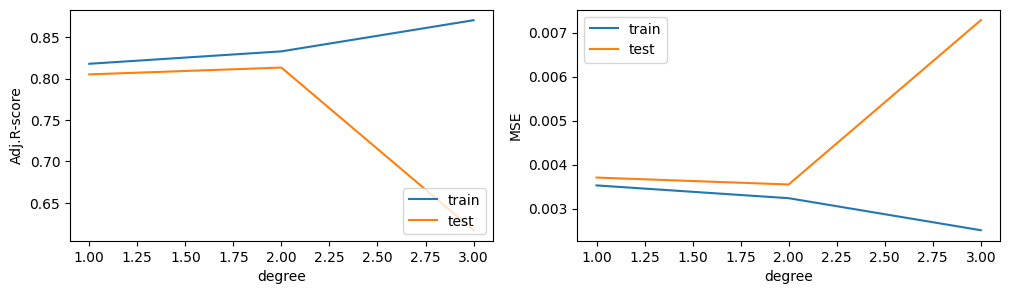

In [ ]:
# Plote
fig, axes = plt.subplots(1, 2, figsize=(12, 3))

axes[0].plot(list(range(1, degrees)), train_scores, label="train")
axes[0].plot(list(range(1, degrees)), test_scores, label="test")
axes[0].legend(loc='lower right')
axes[0].set_xlabel("degree")
axes[0].set_ylabel("Adj.R-score")

axes[1].plot(list(range(1, degrees)), train_loss, label="train")
axes[1].plot(list(range(1, degrees)), test_loss, label="test")
axes[1].legend(loc='upper left')
axes[1].set_xlabel("degree")
axes[1].set_ylabel("MSE")

plt.show()

**🔍OBSERVATION🔎**

- As we go in higher Degree, the model test performance drop significantly Which clearly indicates Overfitting
- The Test score is maximum at degree 2, There for the **best polynomial degree is 2**

In [ ]:
rate_list = list(range(1, degrees))

In [ ]:
# Best degree
index = np.argmax(test_scores)
best_degree = rate_list[index]
best_degree

2

**🔍OBSERVATION🔎**

- The best degree is 2, We are going to use this degree for further evaluation.

#### <font color="lightgreen">**9.4.2) Polynomial Regression implementation**</font>

In [ ]:
# Polynomial Regression

# Transform the features into polynomial features
from sklearn.preprocessing import PolynomialFeatures
degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
# Shape of X_train and X_test
X_train.shape, X_test.shape

((400, 7), (100, 7))

In [ ]:
# Polynomial features been created
X_train_poly.shape, X_test_poly.shape

((400, 36), (100, 36))

In [ ]:
# Standardize the polynomial features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

In [ ]:
# Import the required library
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
Polynomial_Reg_model = LinearRegression()

# Train the model
Polynomial_Reg_model.fit(X_train_poly_scaled, y_train)

LinearRegression()

In [ ]:
# Predicting values for the test data
y_pred_train_poly = Polynomial_Reg_model.predict(X_train_poly_scaled)
y_pred_test_poly = Polynomial_Reg_model.predict(X_test_poly_scaled)

In [ ]:
# Performance of Polynomial Regression
print("Performance of Polynomial Regression")
print("-"*36)
print("Performance of Train data")
print("-"*26)
evaluate_model_performance(y_train, y_pred_train_poly, Polynomial_Reg_model)
print()
print("Performance of Test data")
print("-"*26)
evaluate_model_performance(y_test, y_pred_test_poly, Polynomial_Reg_model)

Performance of Polynomial Regression
------------------------------------
Performance of Train data
--------------------------
MSE: 0.0032
MAE: 0.04
RMSE: 0.0569
R-squared: 0.84
Adjusted R-squared: 0.82

Performance of Test data
--------------------------
MSE: 0.0035
MAE: 0.0406
RMSE: 0.0596
R-squared: 0.83
Adjusted R-squared: 0.73


**🔍OBSERVATION🔎**

- Polynomial Regression provides a slight improvement over Linear Regression in terms of training data performance with an R-squared value of 0.84.
- However, there is a drop in the Adjusted R-squared value for the test data (0.73), indicating potential overfitting. The model fits the training data well but doesn't generalize as well to unseen data.




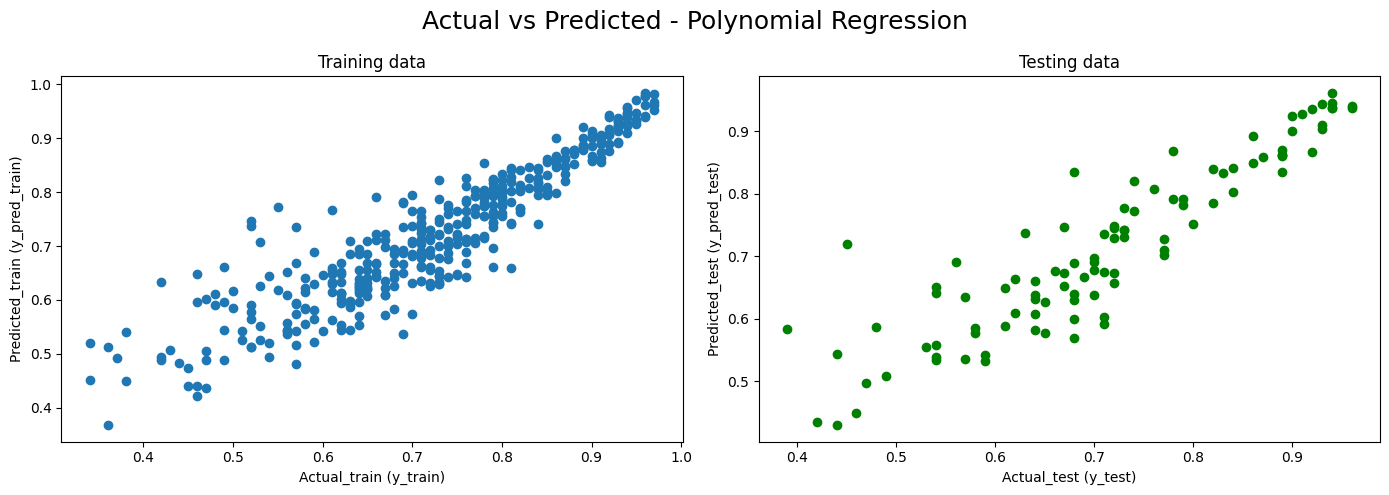

In [ ]:
# Actual vs Predicted
plt.figure(figsize=(14, 5))

# Actual vs Predicted Plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train_poly)
plt.xlabel('Actual_train (y_train)')
plt.ylabel('Predicted_train (y_pred_train)')
plt.title('Training data')

# Actual vs Predicted Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test_poly, color="green")
plt.xlabel('Actual_test (y_test)')
plt.ylabel('Predicted_test (y_pred_test)')
plt.title('Testing data')

plt.suptitle("Actual vs Predicted - Polynomial Regression", fontsize = 18)
plt.tight_layout()
plt.show()

### <font color="green">**9.5) Regularization**</font>

#### <font color="lightgreen">**9.5.1) Laso regression model**</font>

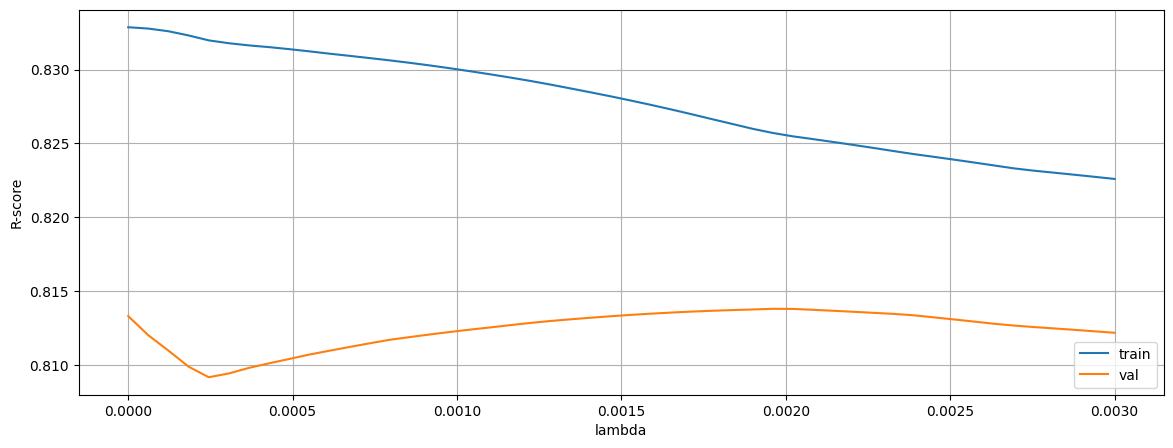

In [ ]:
# Hyperparameter Tuning: find the best regularization strength
from sklearn.linear_model import Lasso, Ridge

# To find best lambda
degree = 2 # is best

train_scores = []
test_scores = []

rate_list = np.linspace(0,0.003,50)

for rate in rate_list:

  # Creating pipeline()
  polyreg_scaled = make_pipeline(PolynomialFeatures(2), StandardScaler(), Lasso(alpha=rate))
  polyreg_scaled.fit(X_train, y_train)

  # Calculate R2 Score for train and test data
  train_score = polyreg_scaled.score(X_train, y_train)
  test_score = polyreg_scaled.score(X_test, y_test)

  # Calculate Adj. R2 Score for train and test data
  train_scores.append(adj_r(train_score,X_train,y_train))
  test_scores.append(adj_r(test_score,X_test,y_test))

# Plote
plt.figure(figsize=(14, 5))
plt.plot(rate_list, train_scores, label="train")
plt.plot(rate_list, test_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("R-score")
plt.grid()
plt.show()

In [ ]:
# Best Lambda (or) alpha
index = np.argmax(test_scores)
best_lambda = rate_list[index]
best_lambda

0.0019591836734693877

In [ ]:
# Final Lasso model
# degree 2 and lambda :0.0019591836734693877
final_lasso_model_pipe = make_pipeline(PolynomialFeatures(2), StandardScaler(), Lasso(alpha=best_lambda))
final_lasso_model_pipe.fit(X_train, y_train)

# Predicting values for the train and test data
y_pred_train_lasso = final_lasso_model_pipe.predict(X_train)
y_pred_test_lasso = final_lasso_model_pipe.predict(X_test)

# Performance of Lasso Regression
print("Performance of Lasso Regression")
print("-"*36)
# Metrix for train and test data
print("Performance of Train data")
print("-"*26)
evaluate_model_performance(y_train, y_pred_train_lasso, final_lasso_model_pipe)
print()
print("Performance of Test data")
print("-"*26)
evaluate_model_performance(y_test, y_pred_test_lasso, final_lasso_model_pipe)

Performance of Lasso Regression
------------------------------------
Performance of Train data
--------------------------
MSE: 0.0034
MAE: 0.0411
RMSE: 0.0581
R-squared: 0.83
Adjusted R-squared: 0.83

Performance of Test data
--------------------------
MSE: 0.0035
MAE: 0.0411
RMSE: 0.0595
R-squared: 0.83
Adjusted R-squared: 0.81


**🔍OBSERVATION🔎**

- Lasso Regression performs similarly to Linear Regression with a slight improvement in the training data R-squared value (0.83).
- The model maintains a consistent Adjusted R-squared value of 0.81 on the test data, suggesting a good balance between model complexity and generalization.



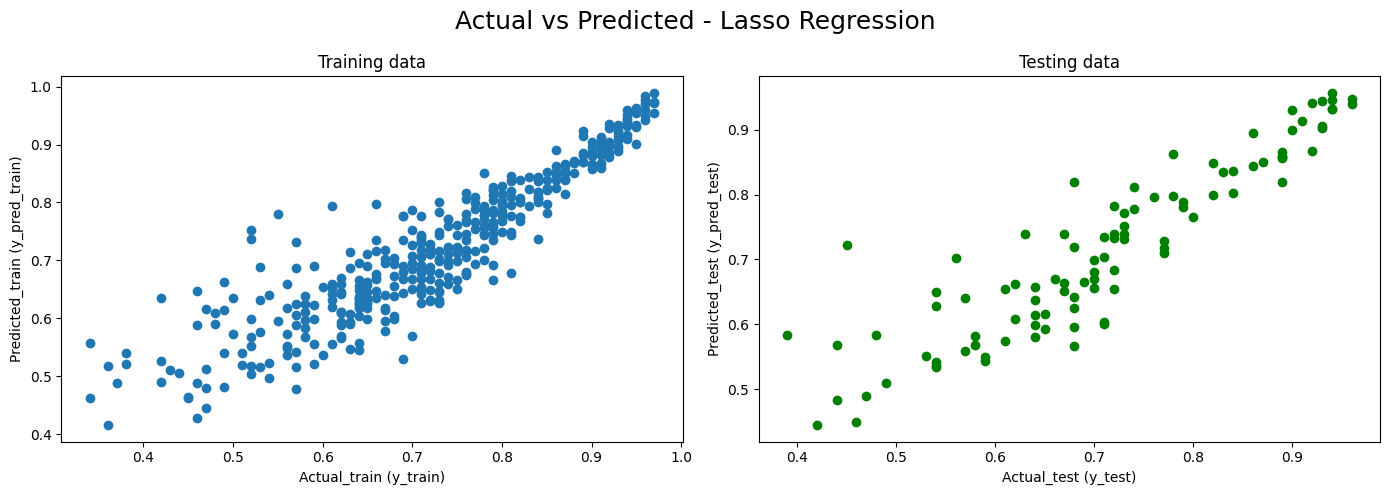

In [ ]:
# Actual vs Predicted
plt.figure(figsize=(14, 5))

# Actual vs Predicted Plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train_lasso)
plt.xlabel('Actual_train (y_train)')
plt.ylabel('Predicted_train (y_pred_train)')
plt.title('Training data')

# Actual vs Predicted Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test_lasso, color="green")
plt.xlabel('Actual_test (y_test)')
plt.ylabel('Predicted_test (y_pred_test)')
plt.title('Testing data')

plt.suptitle("Actual vs Predicted - Lasso Regression", fontsize = 18)
plt.tight_layout()
plt.show()

#### <font color="lightgreen">**9.5.2) Ridge regression model**</font>

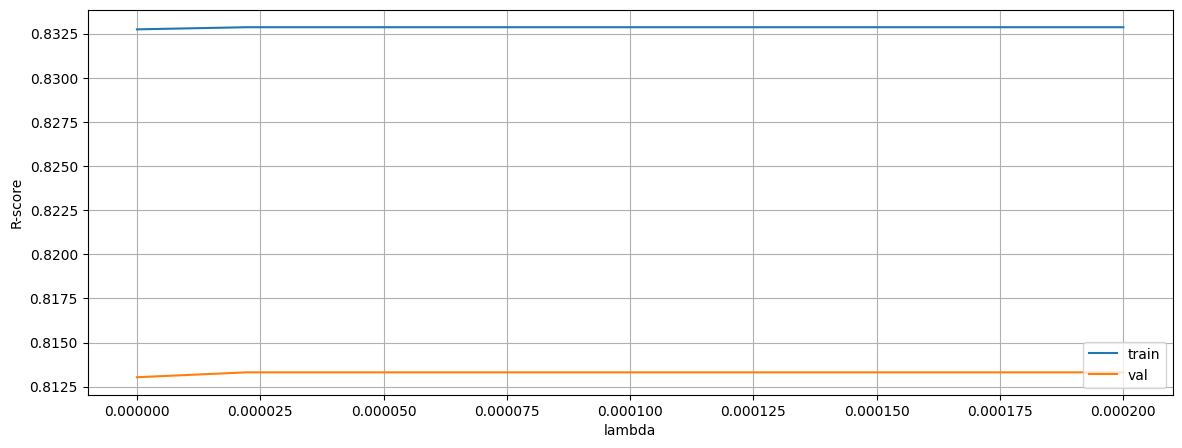

In [ ]:
# Hyperparameter Tuning: find the best regularization strength
from sklearn.linear_model import Lasso, Ridge

# To find best lambda
degree = 2 # is best

train_scores = []
test_scores = []

rate_list = np.linspace(0,0.0002,10)

for rate in rate_list:

  # Creating pipeline()
  polyreg_scaled = make_pipeline(PolynomialFeatures(2), StandardScaler(), Ridge(alpha=rate))
  polyreg_scaled.fit(X_train, y_train)

  # Calculate R2 Score for train and test data
  train_score = polyreg_scaled.score(X_train, y_train)
  test_score = polyreg_scaled.score(X_test, y_test)

  # Calculate Adj. R2 Score for train and test data
  train_scores.append(adj_r(train_score,X_train,y_train))
  test_scores.append(adj_r(test_score,X_test,y_test))

# Plote
plt.figure(figsize=(14, 5))
plt.plot(rate_list, train_scores, label="train")
plt.plot(rate_list, test_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("R-score")
plt.grid()
plt.show()

In [ ]:
# Best Lambda (or) alpha
index = np.argmax(test_scores)
best_lambda_Ridge = rate_list[index]
best_lambda_Ridge

2.2222222222222223e-05

In [ ]:
# Final Lasso model
# degree: 2 and lambda :2.2222222222222223e-05
final_ridge_model_pipe = make_pipeline(PolynomialFeatures(2), StandardScaler(), Ridge(alpha=best_lambda_Ridge))
final_ridge_model_pipe.fit(X_train, y_train)

# Predicting values for the train and test data
y_pred_train_ridge = final_ridge_model_pipe.predict(X_train)
y_pred_test_ridge = final_ridge_model_pipe.predict(X_test)

# Performance of Ridge Regression
print("Performance of Ridge Regression")
print("-"*36)
# Metrix for train and test data
print("Performance of Train data")
print("-"*26)
evaluate_model_performance(y_train, y_pred_train_ridge, final_ridge_model_pipe)
print()
print("Performance of Test data")
print("-"*26)
evaluate_model_performance(y_test, y_pred_test_ridge, final_ridge_model_pipe)

Performance of Ridge Regression
------------------------------------
Performance of Train data
--------------------------
MSE: 0.0032
MAE: 0.04
RMSE: 0.0569
R-squared: 0.84
Adjusted R-squared: 0.83

Performance of Test data
--------------------------
MSE: 0.0035
MAE: 0.0406
RMSE: 0.0596
R-squared: 0.83
Adjusted R-squared: 0.81


**🔍OBSERVATION🔎**
- Ridge Regression shows the best performance in terms of training R-squared (0.84) and maintains a good performance on test data with an Adjusted R-squared of 0.81.
- The model demonstrates good generalization with low MSE, MAE, and RMSE values.

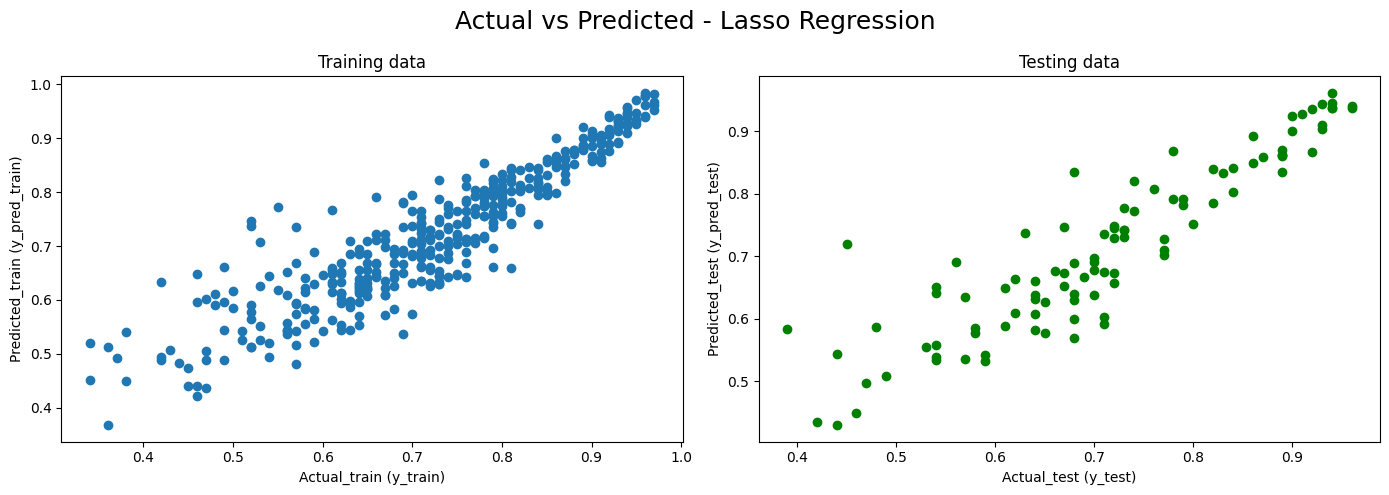

In [ ]:
# Actual vs Predicted
plt.figure(figsize=(14, 5))

# Actual vs Predicted Plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train_ridge)
plt.xlabel('Actual_train (y_train)')
plt.ylabel('Predicted_train (y_pred_train)')
plt.title('Training data')

# Actual vs Predicted Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test_ridge, color="green")
plt.xlabel('Actual_test (y_test)')
plt.ylabel('Predicted_test (y_pred_test)')
plt.title('Testing data')

plt.suptitle("Actual vs Predicted - Lasso Regression", fontsize = 18)
plt.tight_layout()
plt.show()

#### <font color="lightgreen">**9.5.3) Elastic Net regression model**</font>

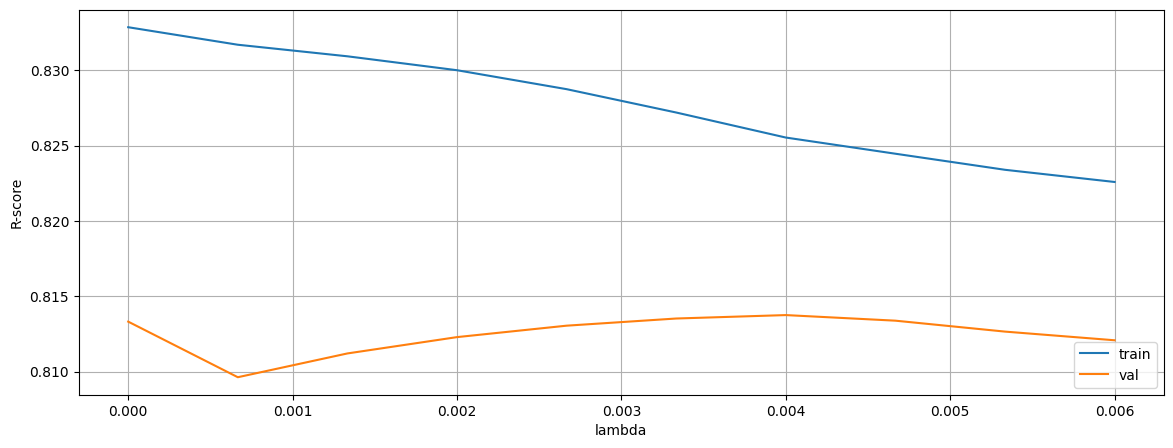

In [ ]:
# Hyperparameter Tuning: find the best regularization strength
from sklearn.linear_model import ElasticNet

# To find best lambda
degree = 2 # is best

train_scores = []
test_scores = []

rate_list = np.linspace(0,0.006,10)

for rate in rate_list:

  # Creating pipeline()
  polyreg_scaled = make_pipeline(PolynomialFeatures(2), StandardScaler(), ElasticNet(alpha=rate))
  polyreg_scaled.fit(X_train, y_train)

  # Calculate R2 Score for train and test data
  train_score = polyreg_scaled.score(X_train, y_train)
  test_score = polyreg_scaled.score(X_test, y_test)

  # Calculate Adj. R2 Score for train and test data
  train_scores.append(adj_r(train_score,X_train,y_train))
  test_scores.append(adj_r(test_score,X_test,y_test))

# Plote
plt.figure(figsize=(14, 5))
plt.plot(rate_list, train_scores, label="train")
plt.plot(rate_list, test_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("R-score")
plt.grid()
plt.show()

In [ ]:
# Best Lambda (or) alpha
index = np.argmax(test_scores)
best_lambda_ElasticNet = rate_list[index]
best_lambda_ElasticNet

0.004

In [ ]:
# Final ElasticNet model
# degree: 2 and lambda :0.004
final_ElasticNet_model_pipe = make_pipeline(PolynomialFeatures(2), StandardScaler(), Ridge(alpha=best_lambda_ElasticNet))
final_ElasticNet_model_pipe.fit(X_train, y_train)

# Predicting values for the train and test data
y_pred_train_ElasticNet = final_ElasticNet_model_pipe.predict(X_train)
y_pred_test_ElasticNet = final_ElasticNet_model_pipe.predict(X_test)

# Performance of ElasticNet Regression
print("Performance of ElasticNet Regression")
print("-"*36)
# Metrix for train and test data
print("Performance of Train data")
print("-"*26)
evaluate_model_performance(y_train, y_pred_train_ElasticNet, final_ElasticNet_model_pipe)
print()
print("Performance of Test data")
print("-"*26)
evaluate_model_performance(y_test, y_pred_test_ElasticNet, final_ElasticNet_model_pipe)

Performance of ElasticNet Regression
------------------------------------
Performance of Train data
--------------------------
MSE: 0.0032
MAE: 0.04
RMSE: 0.0569
R-squared: 0.84
Adjusted R-squared: 0.83

Performance of Test data
--------------------------
MSE: 0.0035
MAE: 0.0406
RMSE: 0.0596
R-squared: 0.83
Adjusted R-squared: 0.81


**🔍OBSERVATION🔎**
- ElasticNet Regression also performs well with the highest training R-squared (0.84) and a consistent Adjusted R-squared (0.81) on the test data.
- The performance metrics are similar to Ridge Regression, indicating a strong balance between bias and variance.

### <font color="green">**9.6) Model Conclusion😀**</font>



**Ridge Regression and ElasticNet Regression** are recommended for their strong performance and balance between model complexity and generalization. Both models have demonstrated consistent metrics across training and test data, indicating their robustness for predicting the chance of admission.



---

## **10) Inference**✌


---




- <font color="green">**University Preference:**</font>
    - The majority of applicants (32%) prefer universities with a rating of 3, followed by ratings of 2 (25%) and 4 (21%). This indicates a significant preference for mid-tier universities among applicants.

- <font color="green">**Research Experience:**</font>
    - 56% of the applicants have research experience, suggesting that having research experience is a common trait among those applying for graduate programs.

- <font color="green">**Skewed Admission Chances:**</font>
    - The chances of admission are negatively skewed, meaning more applicants have higher probabilities of being admitted, indicating overall strong applicant profiles.

- <font color="green">**Key Factors for Admission:**</font>
    - CGPA has the highest correlation with the chance of admission, followed by GRE and TOEFL scores. This highlights the importance of academic performance in the admission process.

- <font color="green">**University Ratings and Admission:**</font>
    - Higher university ratings are associated with higher chances of admission, emphasizing the impact of the university's prestige on admission decisions.

- <font color="green">**Impact of Research:**</font>
    - Applicants with research experience have a higher chance of admission, especially noticeable in universities with the highest rating (5).

- <font color="green">**Performance of Models:**</font>
    - Polynomial, Lasso, Ridge, and ElasticNet regressions all show similar performance, slightly better than simple linear regression, indicating that more complex models can capture the nuances of the data better.

- <font color="green">**Model Metrics:**</font>
    - All models have high R-squared values (around 0.82 to 0.84) for train data, indicating good fit, and slightly lower for test data, showing consistency but room for improvement in generalization.

- <font color="green">**Importance of CGPA:**</font>
    - Among all features, CGPA carries the highest weight, followed by GRE and TOEFL scores, underscoring the critical role of academic excellence.

- <font color="green">**Model Comparison:**</font>
    - While Polynomial and Ridge regressions provide the best performance, the differences across models are marginal. This suggests that multiple approaches can be viable for predicting admission chances.


---

## **11) Recommendations🤝**

---



- <font color="green">**Focus on Academic Excellence:**</font>

    - Encourage students to maintain a high CGPA, as it significantly impacts their admission chances.

- <font color="green">**GRE and TOEFL Preparation:**</font>
    - Offer resources and support for GRE and TOEFL preparation since these scores are crucial for admission.

- <font color="green">**Promote Research Opportunities:**</font>
    - Facilitate more research opportunities for students, as research experience notably increases admission probabilities.

- <font color="green">**Guidance on University Selection:**</font>
    - Provide tailored advice to students on selecting universities based on their profiles, focusing on those with mid to high ratings.

- <font color="green">**Application Strategy:**</font>
    - Develop strategies for students to apply to a balanced mix of universities (ratings 2 to 4) to maximize their admission chances.

- <font color="green">**Highlighting Research Impact:**</font>
    - Emphasize the benefits of research experience in marketing materials and counseling sessions.

- <font color="green">**Improving Admission Predictors:**</font>
    - Continuously refine and validate admission prediction models using updated data to enhance accuracy.

- <font color="green">**Resource Allocation:**</font>
    - Allocate more resources to support areas identified as critical, such as GRE/TOEFL prep and research opportunities.


---



---



**By**

SANKARAN MEENAKSHI SUNDARAM

DSML July 2023